<a href="https://colab.research.google.com/github/ysyhub9/ysyhub9/blob/main/ColabProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Í∏ÄÍº¥ÏùÑ ÏÑ§ÏπòÌïòÍ∏∞ ÏúÑÌï¥ (Ïù¥ÌõÑ [Îü∞ÌÉÄÏûÑ] -> [ÏÑ∏ÏÖò Îã§Ïãú ÏãúÏûë])
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
#Í∏ÄÏî®Ï≤¥ ÏßÄÏ†ï -> ÏãúÍ∞ÅÌôî Îã®Í≥ÑÏóêÏÑú Í∑∏ÎûòÌîÑÏóê ÌïúÍ∏Ä ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
#plt.rcParams['font.family'] = 'DejaVu Sans'
#plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
print("=== Îç∞Ïù¥ÌÑ∞ Î°úÎìú ===")
maternal_mortality = pd.read_csv('dataset/5. Maternal Mortality Ratio.csv')
health_expenditure = pd.read_csv('dataset/4. Domestic general government health expenditure ( of GDP).csv')
underweight = pd.read_csv('dataset/2. Prevalence of Underweight among Female Adults (Age Standardized Estimate).csv')
school_enrollment = pd.read_csv('dataset/7. School enrollment secondary female ( gross).csv')

print(f"ÏÇ∞Î™® ÏÇ¨ÎßùÎ•† Îç∞Ïù¥ÌÑ∞: {maternal_mortality.shape}")
print(f"ÏùòÎ£å ÏßÄÏ∂ú Îç∞Ïù¥ÌÑ∞: {health_expenditure.shape}")
print(f"Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Îç∞Ïù¥ÌÑ∞: {underweight.shape}")
print(f"Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•† Îç∞Ïù¥ÌÑ∞: {school_enrollment.shape}")


# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
print("\n=== Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ===")

# Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨ (Î≥ëÌï©ÌïòÍ±∞ÎÇò Î∂ÑÏÑù Ïãú ÏßÅÍ¥ÄÏ†ÅÏù∏ Î≥ÄÏàòÎ™Ö ÏÇ¨Ïö©ÏùÑ ÏúÑÌï¥ -> Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÏπºÎüº Ïù¥Î¶ÑÏùÑ ÌëúÏ§ÄÌôî)
maternal_mortality.columns = ['Country_Name', 'Country_Code', 'Year', 'Maternal_Mortality_Ratio']
health_expenditure.columns = ['Country_Name', 'Country_Code', 'Year', 'Health_Expenditure_GDP']
underweight.columns = ['Country_Code', 'Country_Name', 'Year', 'Female_Underweight_Prevalence']
school_enrollment.columns = ['Country_Name', 'Country_Code', 'Year', 'Female_Secondary_Enrollment']

# 2016ÎÖÑ Îç∞Ïù¥ÌÑ∞Îßå ÏÑ†ÌÉù (Í∞ÄÏû• ÏôÑÏ†ÑÌïú Îç∞Ïù¥ÌÑ∞)
print("\n=== 2016ÎÖÑ Îç∞Ïù¥ÌÑ∞Îßå ÏÑ†ÌÉù ===")
maternal_mortality_2016 = maternal_mortality[maternal_mortality['Year'] == 2016].copy()
health_expenditure_2016 = health_expenditure[health_expenditure['Year'] == 2016].copy()
underweight_2016 = underweight[underweight['Year'] == 2016].copy()
school_enrollment_2016 = school_enrollment[school_enrollment['Year'] == 2016].copy()

print(f"2016ÎÖÑ ÏÇ∞Î™® ÏÇ¨ÎßùÎ•† Îç∞Ïù¥ÌÑ∞: {maternal_mortality_2016.shape}")
print(f"2016ÎÖÑ ÏùòÎ£å ÏßÄÏ∂ú Îç∞Ïù¥ÌÑ∞: {health_expenditure_2016.shape}")
print(f"2016ÎÖÑ Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Îç∞Ïù¥ÌÑ∞: {underweight_2016.shape}")
print(f"2016ÎÖÑ Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•† Îç∞Ïù¥ÌÑ∞: {school_enrollment_2016.shape}")

=== Îç∞Ïù¥ÌÑ∞ Î°úÎìú ===
ÏÇ∞Î™® ÏÇ¨ÎßùÎ•† Îç∞Ïù¥ÌÑ∞: (1596, 4)
ÏùòÎ£å ÏßÄÏ∂ú Îç∞Ïù¥ÌÑ∞: (1596, 4)
Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Îç∞Ïù¥ÌÑ∞: (1170, 4)
Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•† Îç∞Ïù¥ÌÑ∞: (1596, 4)

=== Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ===

=== 2016ÎÖÑ Îç∞Ïù¥ÌÑ∞Îßå ÏÑ†ÌÉù ===
2016ÎÖÑ ÏÇ∞Î™® ÏÇ¨ÎßùÎ•† Îç∞Ïù¥ÌÑ∞: (266, 4)
2016ÎÖÑ ÏùòÎ£å ÏßÄÏ∂ú Îç∞Ïù¥ÌÑ∞: (266, 4)
2016ÎÖÑ Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Îç∞Ïù¥ÌÑ∞: (195, 4)
2016ÎÖÑ Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•† Îç∞Ïù¥ÌÑ∞: (266, 4)



=== Í≤∞Ï∏°Ïπò ÌôïÏù∏ ===
ÏÇ∞Î™® ÏÇ¨ÎßùÎ•† Í≤∞Ï∏°Ïπò: 33
ÏùòÎ£å ÏßÄÏ∂ú Í≤∞Ï∏°Ïπò: 32
Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Í≤∞Ï∏°Ïπò: 4
Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•† Í≤∞Ï∏°Ïπò: 85

=== Îç∞Ïù¥ÌÑ∞ Î≥ëÌï© ===
Î≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (192, 6)

=== Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ===
Î≥ëÌï© Ï†Ñ Í≤∞Ï∏°Ïπò:
Country_Code                      0
Country_Name                      0
Maternal_Mortality_Ratio          9
Health_Expenditure_GDP            6
Female_Underweight_Prevalence     4
Female_Secondary_Enrollment      65
dtype: int64

Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (121, 6)

=== Ïù¥ÏÉÅÏπò ÌÉêÏßÄ ===
Ïù¥ÏÉÅÏπò Í∞úÏàò:
Maternal_Mortality_Ratio: 13Í∞ú (Î≤îÏúÑ: -262.00 ~ 458.00)
Health_Expenditure_GDP: 1Í∞ú (Î≤îÏúÑ: -2.76 ~ 9.64)
Female_Underweight_Prevalence: 3Í∞ú (Î≤îÏúÑ: -7.30 ~ 17.50)
Female_Secondary_Enrollment: 10Í∞ú (Î≤îÏúÑ: 31.87 ~ 149.66)


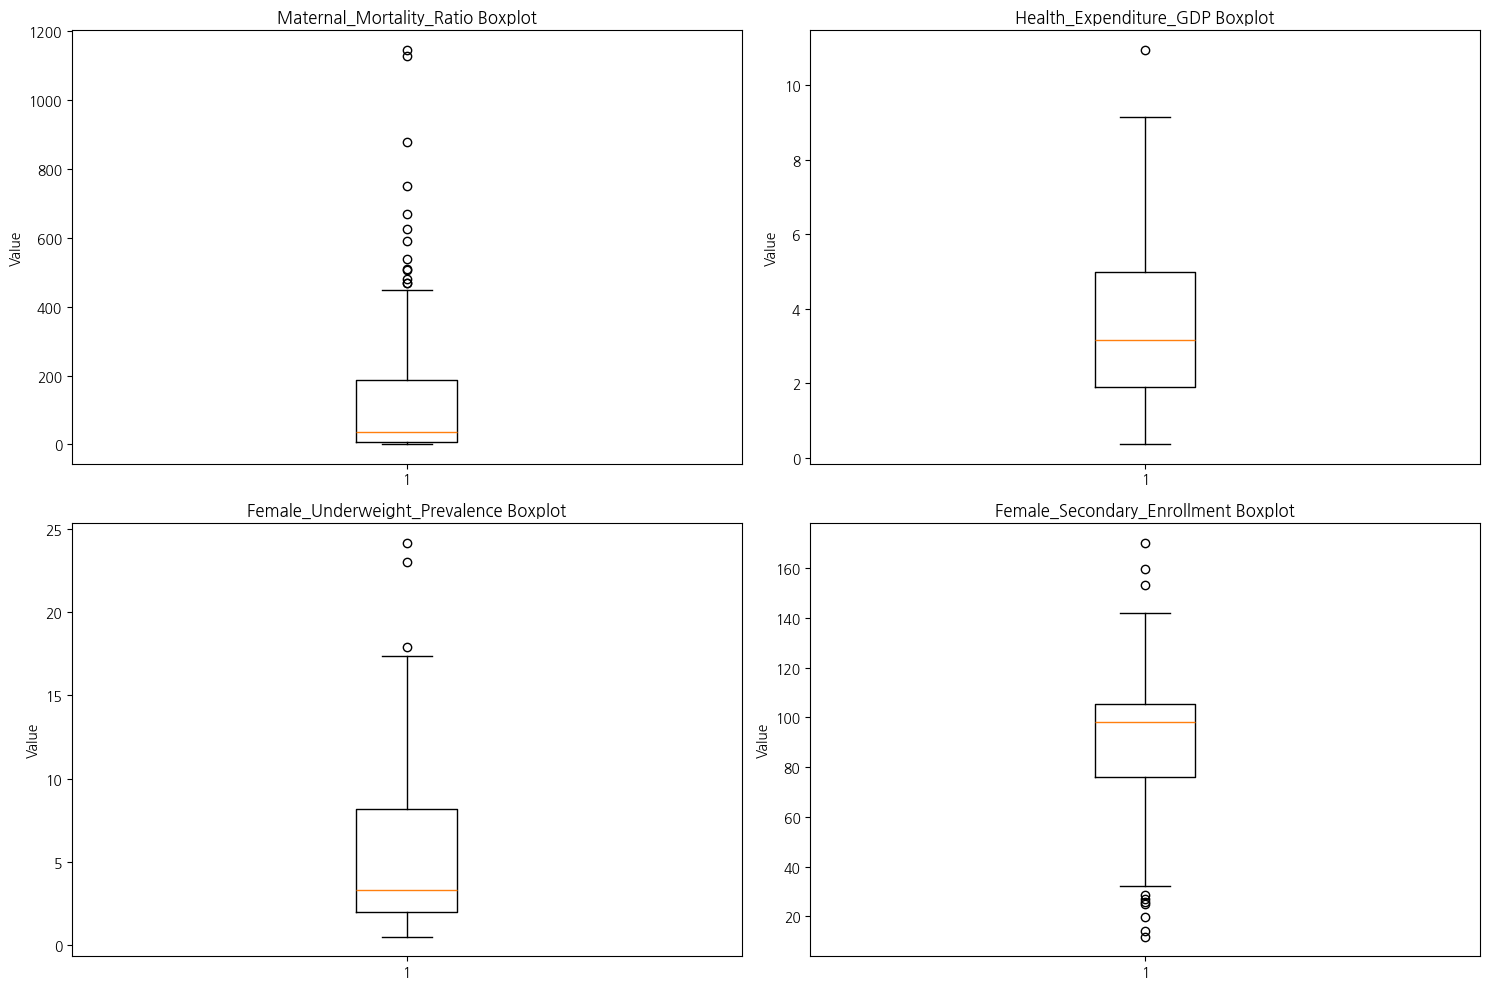


=== Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ===
Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ï†Ñ: 121Í∞ú
Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ: 108Í∞ú


In [ ]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
print("\n=== Í≤∞Ï∏°Ïπò ÌôïÏù∏ ===")
print("ÏÇ∞Î™® ÏÇ¨ÎßùÎ•† Í≤∞Ï∏°Ïπò:", maternal_mortality_2016['Maternal_Mortality_Ratio'].isnull().sum())
print("ÏùòÎ£å ÏßÄÏ∂ú Í≤∞Ï∏°Ïπò:", health_expenditure_2016['Health_Expenditure_GDP'].isnull().sum())
print("Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Í≤∞Ï∏°Ïπò:", underweight_2016['Female_Underweight_Prevalence'].isnull().sum())
print("Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•† Í≤∞Ï∏°Ïπò:", school_enrollment_2016['Female_Secondary_Enrollment'].isnull().sum())

# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï© (Country_Code Í∏∞Ï§Ä)
print("\n=== Îç∞Ïù¥ÌÑ∞ Î≥ëÌï© ===")
merged_data = maternal_mortality_2016[['Country_Code', 'Country_Name', 'Maternal_Mortality_Ratio']].merge(
    health_expenditure_2016[['Country_Code', 'Health_Expenditure_GDP']], on='Country_Code', how='inner')
merged_data = merged_data.merge(
    underweight_2016[['Country_Code', 'Female_Underweight_Prevalence']], on='Country_Code', how='inner')
merged_data = merged_data.merge(
    school_enrollment_2016[['Country_Code', 'Female_Secondary_Enrollment']], on='Country_Code', how='inner')

print(f"Î≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {merged_data.shape}")

# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
print("\n=== Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ===")
print("Î≥ëÌï© Ï†Ñ Í≤∞Ï∏°Ïπò:")
print(merged_data.isnull().sum())

merged_data = merged_data.dropna()
print(f"\nÍ≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {merged_data.shape}")

# Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Î∞è Ï≤òÎ¶¨
print("\n=== Ïù¥ÏÉÅÏπò ÌÉêÏßÄ ===")

# IQR Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìïú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Í∞Å Î≥ÄÏàòÏùò Ïù¥ÏÉÅÏπò ÌôïÏù∏
variables = ['Maternal_Mortality_Ratio', 'Health_Expenditure_GDP',
            'Female_Underweight_Prevalence', 'Female_Secondary_Enrollment']

print("Ïù¥ÏÉÅÏπò Í∞úÏàò:")
for var in variables:
    outliers, lower, upper = detect_outliers(merged_data, var)
    print(f"{var}: {len(outliers)}Í∞ú (Î≤îÏúÑ: {lower:.2f} ~ {upper:.2f})")

# Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(merged_data[var].dropna())
    plt.title(f'{var} Boxplot')
    plt.ylabel('Value')
plt.tight_layout()
plt.savefig('outliers_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ (ÏÑ†ÌÉùÏ†Å)
print("\n=== Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ===")
original_size = len(merged_data)

# ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†Ïùò Í∑πÎã®Ï†Å Ïù¥ÏÉÅÏπòÎßå Ï†úÍ±∞ (ÏùòÎ£å ÏãúÏä§ÌÖúÏù¥ Îß§Ïö∞ Ïó¥ÏïÖÌïú Íµ≠Í∞ÄÎì§)
maternal_outliers, _, _ = detect_outliers(merged_data, 'Maternal_Mortality_Ratio')
merged_data_clean = merged_data[~merged_data.index.isin(maternal_outliers.index)]

print(f"Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ï†Ñ: {original_size}Í∞ú")
print(f"Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ: {len(merged_data_clean)}Í∞ú")


1) Îç∞Ïù¥ÌÑ∞ ÌíàÏßà¬∑Î∂ÑÌè¨ (Î∞ïÏä§ÌîåÎ°Ø)
- ÌëúÎ≥∏: Í≤∞Ï∏° Ï†úÍ±∞ ÌõÑ N=108Í∞úÍµ≠, ÌÖåÏä§Ìä∏ 22Í∞ú.

- MMR(ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†): Ïò§Î•∏Ï™ΩÏúºÎ°ú Í∏¥ Íº¨Î¶¨(Í∑πÎã®Ïπò Ï°¥Ïû¨). ‚Üí ÏÑ†ÌòïÍ¥ÄÍ≥ÑÍ∞Ä ÏïΩÌïòÍ≥† ÏòàÏ∏°ÎÇúÏù¥ÎèÑ‚Üë.

- Î≥¥Í±¥ÏßÄÏ∂ú¬∑Ïó¨ÏÑ±Ï†ÄÏ≤¥Ï§ë¬∑Ïó¨ÏÑ±Ï§ëÎì±Îì±Î°ùÎ•†: ÎπÑÍµêÏ†Å ÏïàÏ†ïÏ†Å Î∂ÑÌè¨, ÏùºÎ∂Ä ÏïÑÏõÉÎùºÏù¥Ïñ¥Îßå Ï°¥Ïû¨.

EDA


=== Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî ===


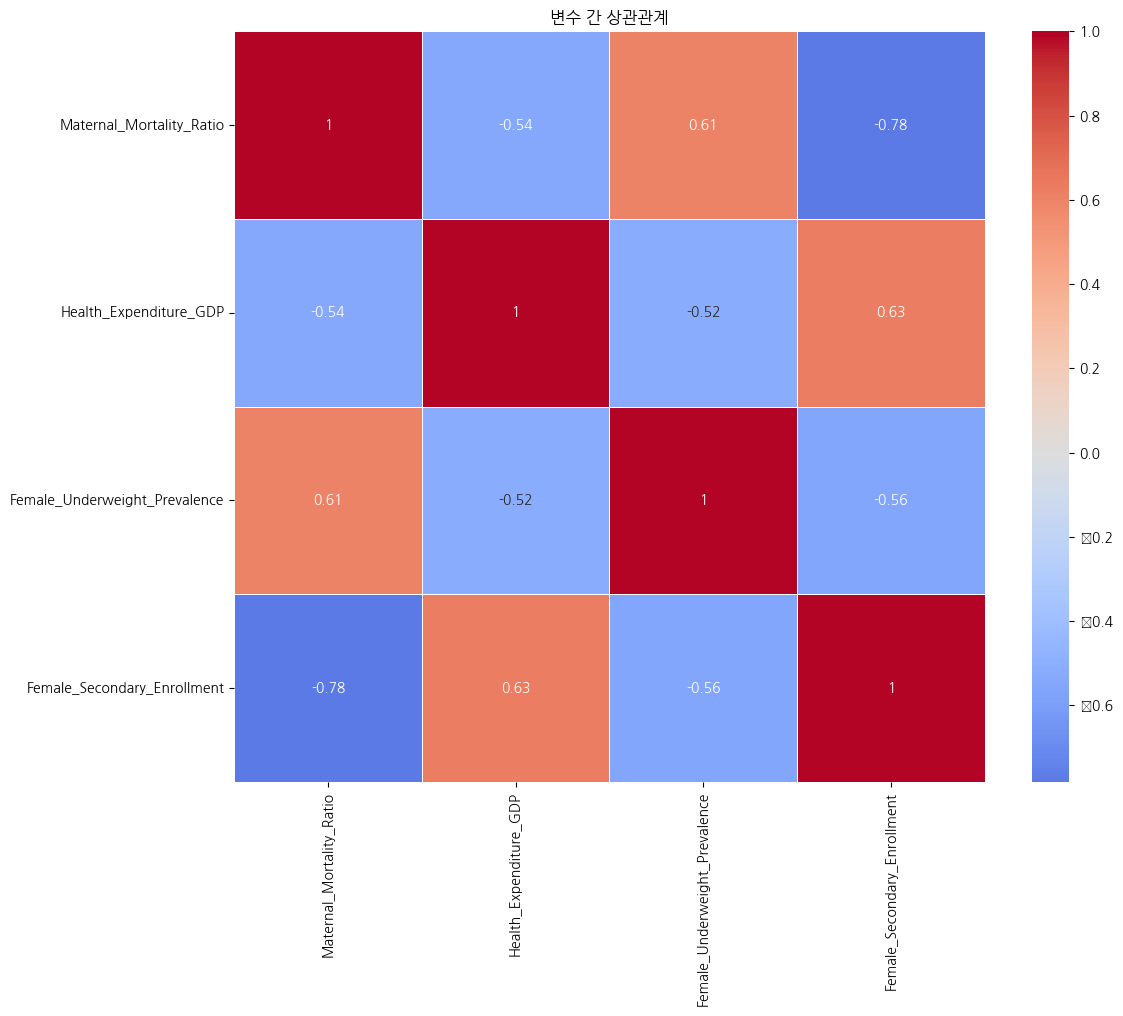

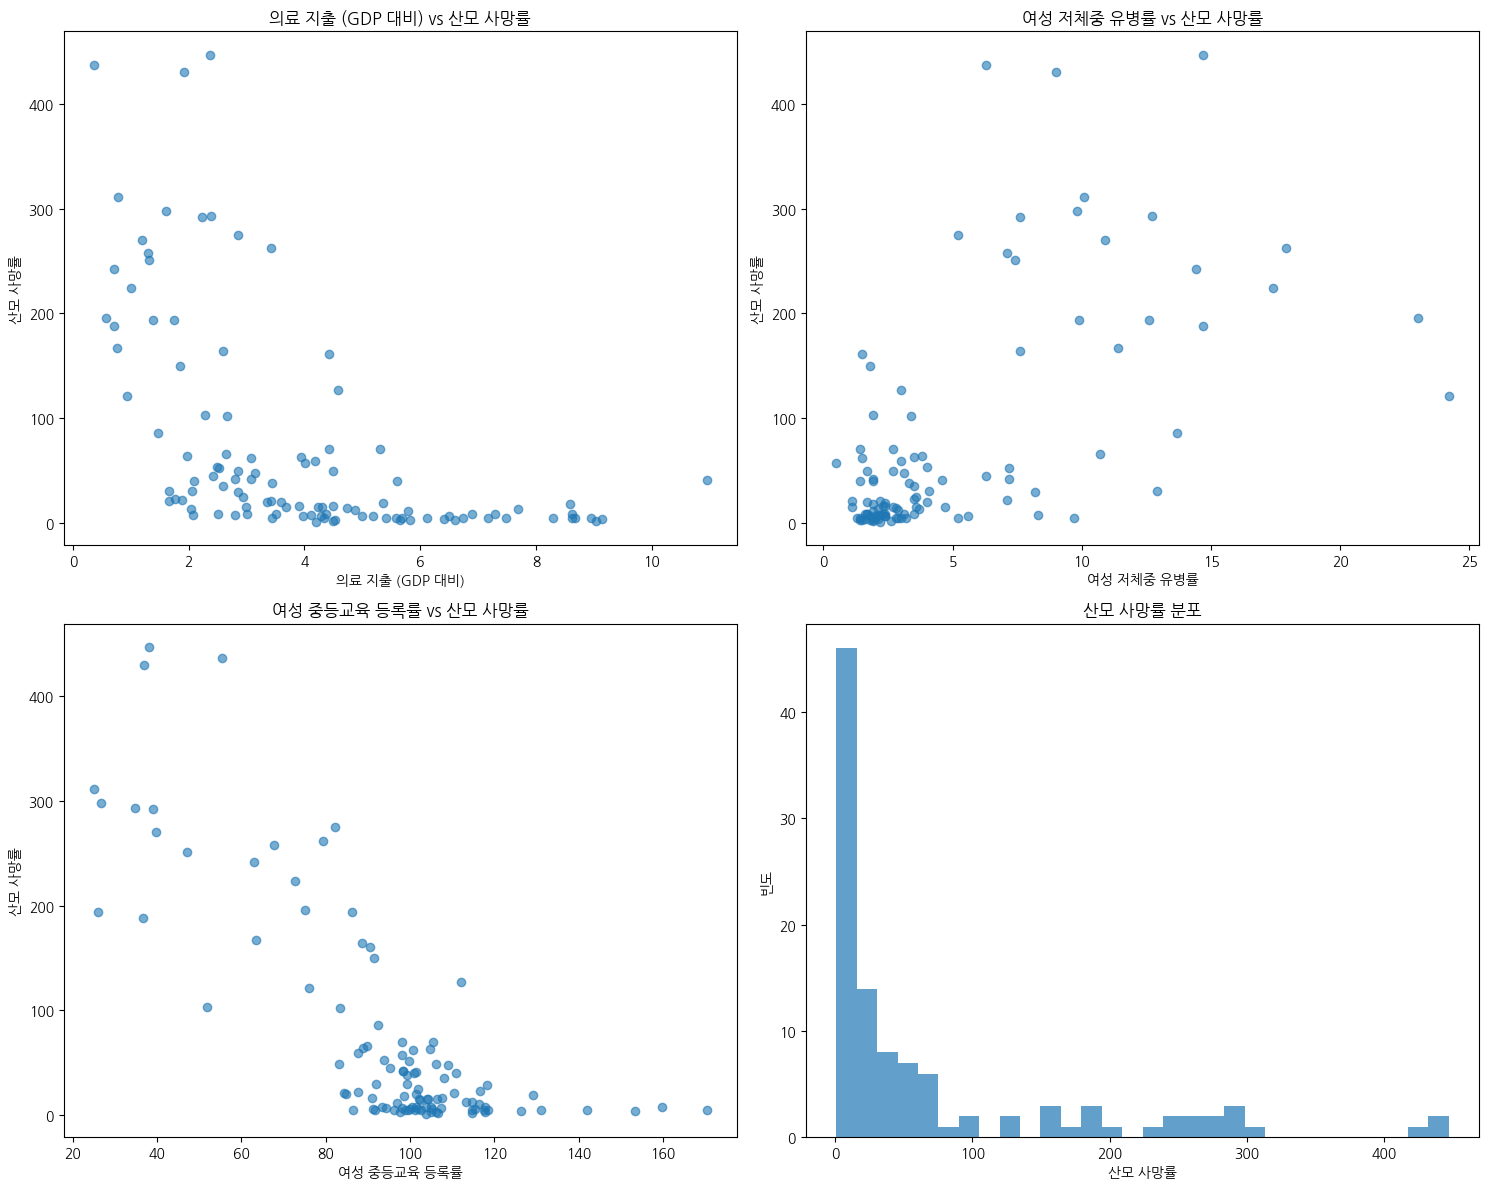

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
print("\n=== Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî ===")

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù (ÌûàÌä∏Îßµ)
plt.figure(figsize=(12, 10))
correlation_matrix = merged_data_clean[['Maternal_Mortality_Ratio', 'Health_Expenditure_GDP',
                                      'Female_Underweight_Prevalence', 'Female_Secondary_Enrollment']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)    #sns.heatmap(): ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏ÎßµÏúºÎ°ú Î≥ÄÏàò Í∞Ñ Í¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî
plt.title('Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


# ÏÇ∞Ï†êÎèÑ (Ï£ºÏöî Î≥ÄÏàò vs Î™®ÏÑ± ÏÇ¨ÎßùÎ•† ÏÇ∞Ï†êÎèÑ)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
variables_x = ['Health_Expenditure_GDP', 'Female_Underweight_Prevalence', 'Female_Secondary_Enrollment']
variables_names = ['ÏùòÎ£å ÏßÄÏ∂ú (GDP ÎåÄÎπÑ)', 'Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Ïú†Î≥ëÎ•†', 'Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•†']

for i, (var, name) in enumerate(zip(variables_x, variables_names)):
    row = i // 2
    col = i % 2
    axes[row, col].scatter(merged_data_clean[var], merged_data_clean['Maternal_Mortality_Ratio'], alpha=0.6)
    axes[row, col].set_xlabel(name)
    axes[row, col].set_ylabel('ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†')
    axes[row, col].set_title(f'{name} vs ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†')

# ÎÑ§ Î≤àÏß∏ Í∑∏ÎûòÌîÑÎäî Ï†ÑÏ≤¥ Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨ (Î™®ÏÑ± ÏÇ¨ÎßùÎ•† Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®?)
axes[1, 1].hist(merged_data_clean['Maternal_Mortality_Ratio'], bins=30, alpha=0.7)
axes[1, 1].set_xlabel('ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†')
axes[1, 1].set_ylabel('ÎπàÎèÑ')
axes[1, 1].set_title('ÏÇ∞Î™® ÏÇ¨ÎßùÎ•† Î∂ÑÌè¨')

plt.tight_layout()
plt.savefig('scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

modeling (ÌöåÍ∑Ä+ÏïôÏÉÅÎ∏î)
- Îã§Ï§ëÌöåÍ∑Ä(LinearRegression) + RandomForestRegressor + GradientBoostingRegressor ÎπÑÍµê


- Í∞Å Î™®Îç∏Ïóê ÎåÄÌï¥ RMSE, R2, MAE Í≥ÑÏÇ∞

- Í≥ÑÏàò(LinearRegreesion)ÏôÄ ÌäπÏÑ± Ï§ëÏöîÎèÑ(Random Forest, GB) Ï∂úÎ†•

- Î™®Îç∏Î≥Ñ ÏÑ±Îä• ÎπÑÍµê Í∑∏ÎûòÌîÑ

- Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í ÎπÑÍµê ÌîåÎ°Ø


=== Î™®Îç∏ÎßÅ Ï§ÄÎπÑ ===
ÌäπÏÑ± Î≥ÄÏàò: ['Health_Expenditure_GDP', 'Female_Underweight_Prevalence', 'Female_Secondary_Enrollment']
ÌÉÄÍ≤ü Î≥ÄÏàò: Maternal_Mortality_Ratio
Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (108, 3)
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (86, 3)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (22, 3)

=== Îã§Ï§ëÌöåÍ∑Ä Î™®Îç∏ ===
Îã§Ï§ëÌöåÍ∑Ä Î™®Îç∏ ÏÑ±Îä•:
MSE: 6169.92
RMSE: 78.55
R¬≤: 0.3706
MAE: 55.25

Îã§Ï§ëÌöåÍ∑Ä Í≥ÑÏàò:
Ï†àÌé∏: 71.7907
Health_Expenditure_GDP: 3.8361
Female_Underweight_Prevalence: 34.5139
Female_Secondary_Enrollment: -66.0935

=== ÏïôÏÉÅÎ∏î Î™®Îç∏ ===
Random Forest Î™®Îç∏ ÏÑ±Îä•:
MSE: 6727.32
RMSE: 82.02
R¬≤: 0.3137
MAE: 55.44

Gradient Boosting Î™®Îç∏ ÏÑ±Îä•:
MSE: 7231.00
RMSE: 85.04
R¬≤: 0.2624
MAE: 57.79

=== ÌäπÏÑ± Ï§ëÏöîÎèÑ ÎπÑÍµê ===
Random Forest ÌäπÏÑ± Ï§ëÏöîÎèÑ:
Health_Expenditure_GDP: 0.1053
Female_Underweight_Prevalence: 0.0451
Female_Secondary_Enrollment: 0.8496

Gradient Boosting ÌäπÏÑ± Ï§ëÏöîÎèÑ:
Health_Expenditure_GDP: 0.0857
Female_Underweight_Prevalence: 0.0311
Female_Secondary_Enr

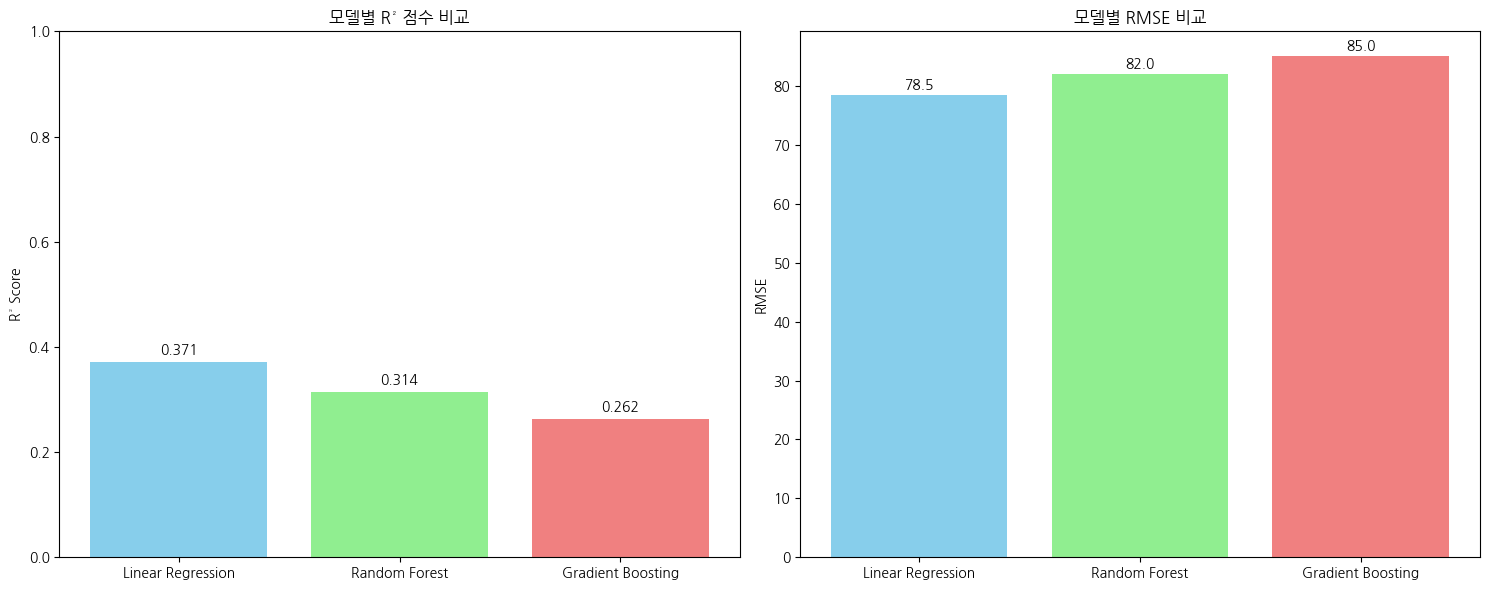

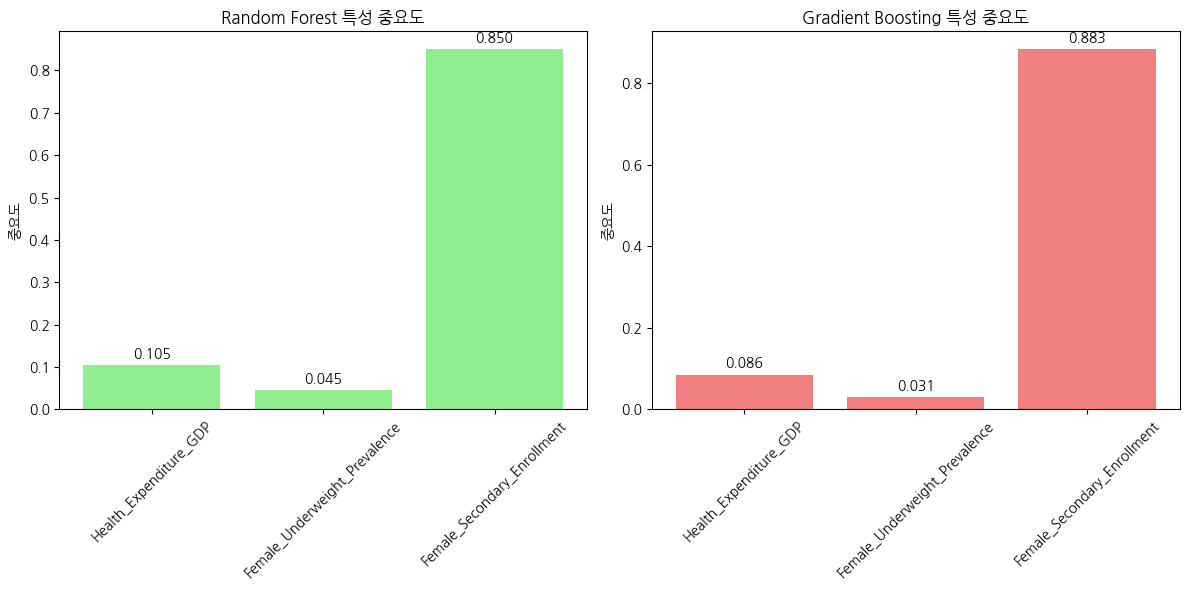

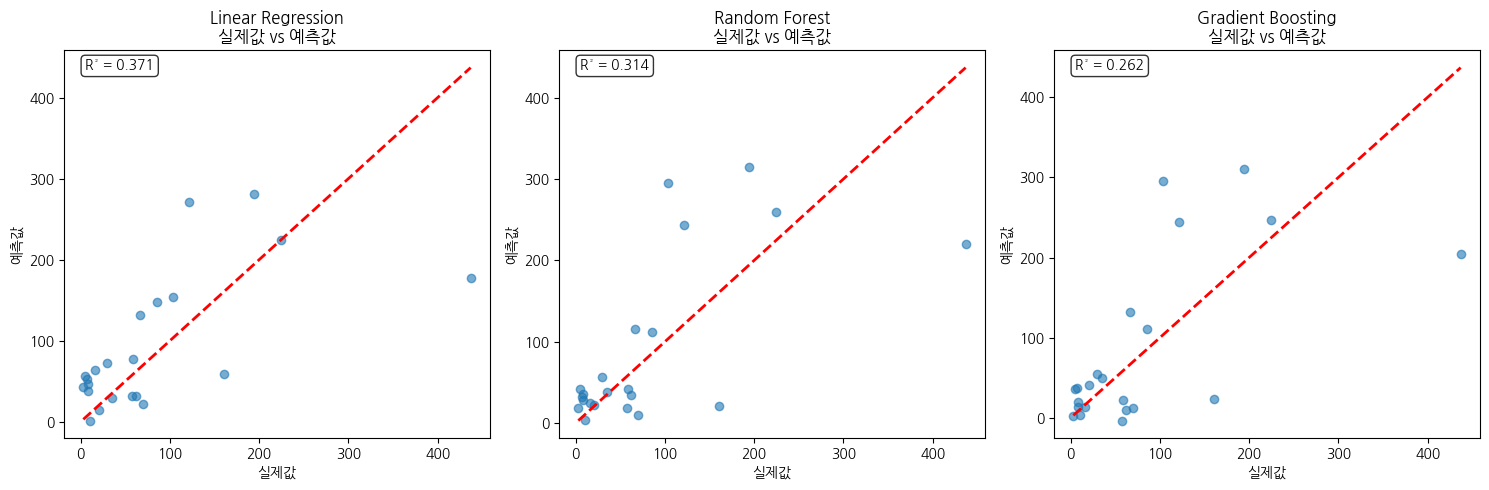


Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ

1. Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥:
   - Ï¥ù Íµ≠Í∞Ä Ïàò: 108Í∞ú
   - ÎèÖÎ¶ΩÎ≥ÄÏàò: ['Health_Expenditure_GDP', 'Female_Underweight_Prevalence', 'Female_Secondary_Enrollment']
   - Ï¢ÖÏÜçÎ≥ÄÏàò: ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†

2. Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê:
   - Linear Regression R¬≤: 0.3706
   - Random Forest R¬≤: 0.3137
   - Gradient Boosting R¬≤: 0.2624

3. ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: Linear Regression

4. ÏùòÎ£å ÏßÄÏ∂úÏùò ÏòÅÌñ•:
   - Îã§Ï§ëÌöåÍ∑ÄÏóêÏÑú ÏùòÎ£å ÏßÄÏ∂ú Í≥ÑÏàò: 3.8361
   - Random ForestÏóêÏÑú ÏùòÎ£å ÏßÄÏ∂ú Ï§ëÏöîÎèÑ: 0.1053
   - Gradient BoostingÏóêÏÑú ÏùòÎ£å ÏßÄÏ∂ú Ï§ëÏöîÎèÑ: 0.0857
   ‚Üí ÏùòÎ£å ÏßÄÏ∂úÏù¥ Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†Ïù¥ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•

5. Í≤∞Î°†:
   - ÏùòÎ£å ÏßÄÏ∂úÏùÄ Îã§Î•∏ Ï°∞Í±¥Îì§ÏùÑ ÌÜµÏ†úÌïú ÌõÑÏóêÎèÑ ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†Ïóê Ïú†ÏùòÌïú ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®
   - ÌäπÌûà Linear Regression Î™®Îç∏ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ ÏòàÏ∏° ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ
   - Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Ïú†Î≥ëÎ•†Í≥º Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•†ÎèÑ Ï§ëÏöîÌïú ÏòàÏ∏° Î≥ÄÏàòÎ°ú ÌôïÏù∏Îê®


In [ ]:
# Î™®Îç∏ÎßÅ Ï§ÄÎπÑ
print("\n=== Î™®Îç∏ÎßÅ Ï§ÄÎπÑ ===")

# ÌäπÏÑ±Í≥º ÌÉÄÍ≤ü Î∂ÑÎ¶¨
X = merged_data_clean[['Health_Expenditure_GDP', 'Female_Underweight_Prevalence', 'Female_Secondary_Enrollment']]
y = merged_data_clean['Maternal_Mortality_Ratio']

print(f"ÌäπÏÑ± Î≥ÄÏàò: {X.columns.tolist()}")
print(f"ÌÉÄÍ≤ü Î≥ÄÏàò: Maternal_Mortality_Ratio")
print(f"Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {X.shape}")

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ÌäπÏÑ± Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {X_train.shape}")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {X_test.shape}")

# Îã§Ï§ëÌöåÍ∑Ä Î™®Îç∏
print("\n=== Îã§Ï§ëÌöåÍ∑Ä Î™®Îç∏ ===")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# ÏòàÏ∏°
y_pred_lr = lr_model.predict(X_test_scaled)

# ÏÑ±Îä• ÌèâÍ∞Ä
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)

print("Îã§Ï§ëÌöåÍ∑Ä Î™®Îç∏ ÏÑ±Îä•:")
print(f"MSE: {lr_mse:.2f}")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R¬≤: {lr_r2:.4f}")
print(f"MAE: {lr_mae:.2f}")

# Í≥ÑÏàò Î∂ÑÏÑù
feature_names = X.columns
coefficients = lr_model.coef_
intercept = lr_model.intercept_

print("\nÎã§Ï§ëÌöåÍ∑Ä Í≥ÑÏàò:")
print(f"Ï†àÌé∏: {intercept:.4f}")
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")


# ÏïôÏÉÅÎ∏î Î™®Îç∏Îì§
print("\n=== ÏïôÏÉÅÎ∏î Î™®Îç∏ ===")

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Î™®Îç∏ ÏÑ±Îä•:")
print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R¬≤: {rf_r2:.4f}")
print(f"MAE: {rf_mae:.2f}")

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)

print("\nGradient Boosting Î™®Îç∏ ÏÑ±Îä•:")
print(f"MSE: {gb_mse:.2f}")
print(f"RMSE: {gb_rmse:.2f}")
print(f"R¬≤: {gb_r2:.4f}")
print(f"MAE: {gb_mae:.2f}")

# ÌäπÏÑ± Ï§ëÏöîÎèÑ ÎπÑÍµê
print("\n=== ÌäπÏÑ± Ï§ëÏöîÎèÑ ÎπÑÍµê ===")

# Random Forest ÌäπÏÑ± Ï§ëÏöîÎèÑ
rf_importance = rf_model.feature_importances_
print("Random Forest ÌäπÏÑ± Ï§ëÏöîÎèÑ:")
for name, importance in zip(feature_names, rf_importance):
    print(f"{name}: {importance:.4f}")

# Gradient Boosting ÌäπÏÑ± Ï§ëÏöîÎèÑ
gb_importance = gb_model.feature_importances_
print("\nGradient Boosting ÌäπÏÑ± Ï§ëÏöîÎèÑ:")
for name, importance in zip(feature_names, gb_importance):
    print(f"{name}: {importance:.4f}")

# Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê ÏãúÍ∞ÅÌôî
print("\n=== Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê ===")

models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
r2_scores = [lr_r2, rf_r2, gb_r2]
rmse_scores = [lr_rmse, rf_rmse, gb_rmse]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# R¬≤ Ï†êÏàò ÎπÑÍµê
bars1 = ax1.bar(models, r2_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
ax1.set_ylabel('R¬≤ Score')
ax1.set_title('Î™®Îç∏Î≥Ñ R¬≤ Ï†êÏàò ÎπÑÍµê')
ax1.set_ylim(0, 1)
for bar, score in zip(bars1, r2_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom')

# RMSE Ï†êÏàò ÎπÑÍµê
bars2 = ax2.bar(models, rmse_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
ax2.set_ylabel('RMSE')
ax2.set_title('Î™®Îç∏Î≥Ñ RMSE ÎπÑÍµê')
for bar, score in zip(bars2, rmse_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{score:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ÌäπÏÑ± Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))

# Random Forest ÌäπÏÑ± Ï§ëÏöîÎèÑ
plt.subplot(1, 2, 1)
bars_rf = plt.bar(feature_names, rf_importance, color='lightgreen')
plt.title('Random Forest ÌäπÏÑ± Ï§ëÏöîÎèÑ')
plt.ylabel('Ï§ëÏöîÎèÑ')
plt.xticks(rotation=45)
for bar, importance in zip(bars_rf, rf_importance):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{importance:.3f}', ha='center', va='bottom')

# Gradient Boosting ÌäπÏÑ± Ï§ëÏöîÎèÑ
plt.subplot(1, 2, 2)
bars_gb = plt.bar(feature_names, gb_importance, color='lightcoral')
plt.title('Gradient Boosting ÌäπÏÑ± Ï§ëÏöîÎèÑ')
plt.ylabel('Ï§ëÏöîÎèÑ')
plt.xticks(rotation=45)
for bar, importance in zip(bars_gb, gb_importance):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{importance:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Ïã§Ï†ú vs ÏòàÏ∏°Í∞í ÎπÑÍµê
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Ïã§Ï†úÍ∞í')
plt.ylabel('ÏòàÏ∏°Í∞í')
plt.title('Linear Regression\nÏã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í')
plt.text(0.05, 0.95, f'R¬≤ = {lr_r2:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Ïã§Ï†úÍ∞í')
plt.ylabel('ÏòàÏ∏°Í∞í')
plt.title('Random Forest\nÏã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í')
plt.text(0.05, 0.95, f'R¬≤ = {rf_r2:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Gradient Boosting
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Ïã§Ï†úÍ∞í')
plt.ylabel('ÏòàÏ∏°Í∞í')
plt.title('Gradient Boosting\nÏã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í')
plt.text(0.05, 0.95, f'R¬≤ = {gb_r2:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.savefig('prediction_comparison.png', dpi=300, bbox_inches='tight')
plt.show()



# Í≤∞Í≥º ÏöîÏïΩ
print("\n" + "="*50)
print("Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ")
print("="*50)

print(f"\n1. Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥:")
print(f"   - Ï¥ù Íµ≠Í∞Ä Ïàò: {len(merged_data_clean)}Í∞ú")
print(f"   - ÎèÖÎ¶ΩÎ≥ÄÏàò: {list(X.columns)}")
print(f"   - Ï¢ÖÏÜçÎ≥ÄÏàò: ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†")

print(f"\n2. Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê:")
print(f"   - Linear Regression R¬≤: {lr_r2:.4f}")
print(f"   - Random Forest R¬≤: {rf_r2:.4f}")
print(f"   - Gradient Boosting R¬≤: {gb_r2:.4f}")

best_model = "Linear Regression" if lr_r2 == max([lr_r2, rf_r2, gb_r2]) else \
            "Random Forest" if rf_r2 == max([lr_r2, rf_r2, gb_r2]) else "Gradient Boosting"

print(f"\n3. ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: {best_model}")

print(f"\n4. ÏùòÎ£å ÏßÄÏ∂úÏùò ÏòÅÌñ•:")
print(f"   - Îã§Ï§ëÌöåÍ∑ÄÏóêÏÑú ÏùòÎ£å ÏßÄÏ∂ú Í≥ÑÏàò: {coefficients[0]:.4f}")
print(f"   - Random ForestÏóêÏÑú ÏùòÎ£å ÏßÄÏ∂ú Ï§ëÏöîÎèÑ: {rf_importance[0]:.4f}")
print(f"   - Gradient BoostingÏóêÏÑú ÏùòÎ£å ÏßÄÏ∂ú Ï§ëÏöîÎèÑ: {gb_importance[0]:.4f}")

# ÏùòÎ£å ÏßÄÏ∂úÏùò ÏòÅÌñ• Ìï¥ÏÑù
if coefficients[0] < 0:
    print(f"   ‚Üí ÏùòÎ£å ÏßÄÏ∂úÏù¥ Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†Ïù¥ Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•")
else:
    print(f"   ‚Üí ÏùòÎ£å ÏßÄÏ∂úÏù¥ Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†Ïù¥ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•")

print(f"\n5. Í≤∞Î°†:")
print(f"   - ÏùòÎ£å ÏßÄÏ∂úÏùÄ Îã§Î•∏ Ï°∞Í±¥Îì§ÏùÑ ÌÜµÏ†úÌïú ÌõÑÏóêÎèÑ ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†Ïóê Ïú†ÏùòÌïú ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®")
print(f"   - ÌäπÌûà {best_model} Î™®Îç∏ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ ÏòàÏ∏° ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ")
print(f"   - Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Ïú†Î≥ëÎ•†Í≥º Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•†ÎèÑ Ï§ëÏöîÌïú ÏòàÏ∏° Î≥ÄÏàòÎ°ú ÌôïÏù∏Îê®")

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 9.1 MB/s eta 0:00:00
              R2     RMSE      MAE
Ridge     0.3725  78.4337  54.8930
Lasso     0.3711  78.5178  55.2213
SVR       0.5189  68.6768  44.8605
CatBoost  0.4029  76.5089  50.2555


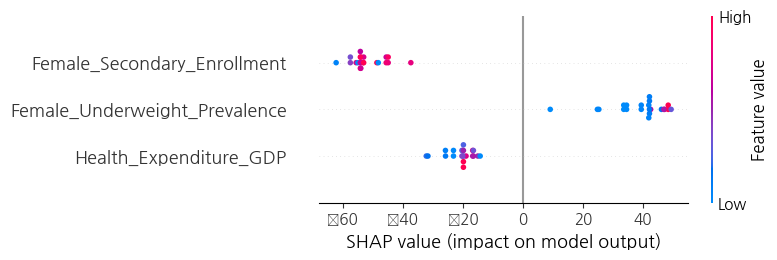

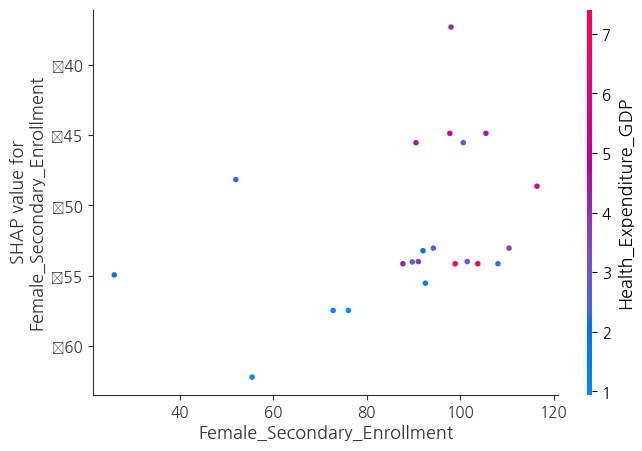

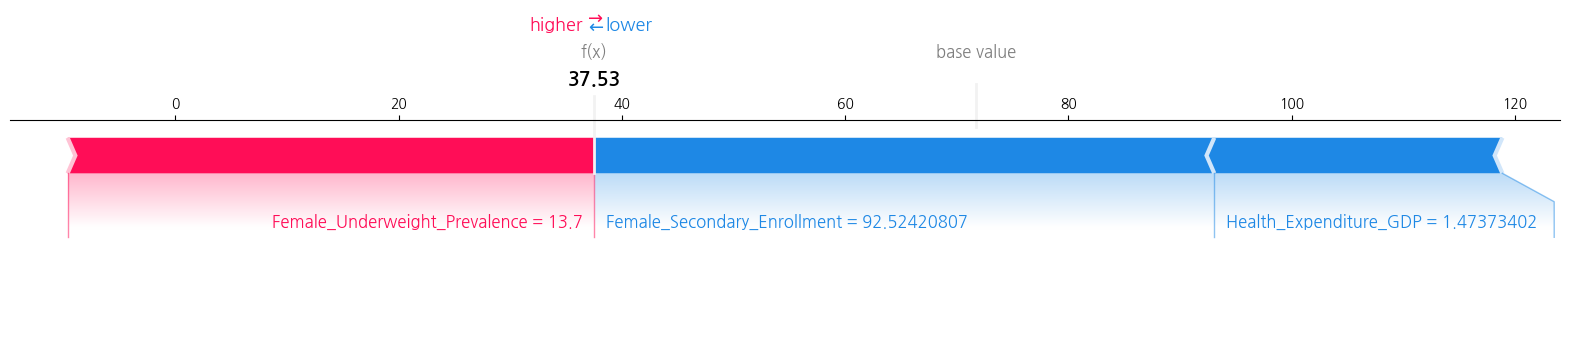

In [ ]:
#### Ï∂îÍ∞Ä ÏΩîÎìú
!pip install catboost

from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

results = {}

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
results['Ridge'] = {
    'R2': r2_score(y_test, y_pred_ridge),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    'MAE': mean_absolute_error(y_test, y_pred_ridge)
}

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
results['Lasso'] = {
    'R2': r2_score(y_test, y_pred_lasso),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    'MAE': mean_absolute_error(y_test, y_pred_lasso)
}

# Support Vector Regression
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
results['SVR'] = {
    'R2': r2_score(y_test, y_pred_svr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_svr)),
    'MAE': mean_absolute_error(y_test, y_pred_svr)
}

# CatBoost Regressor
cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train_scaled, y_train)
y_pred_cat = cat_model.predict(X_test_scaled)
results['CatBoost'] = {
    'R2': r2_score(y_test, y_pred_cat),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_cat)),
    'MAE': mean_absolute_error(y_test, y_pred_cat)
}

# Í≤∞Í≥º Ï∂úÎ†•
df_results = pd.DataFrame(results).T.round(4)
print(df_results)


# ===== SHAP Ìï¥ÏÑù =====
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

# Summary Plot: Î≥ÄÏàò ÏòÅÌñ•Î†•+Î∞©Ìñ•
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Dependence Plot: ÏµúÏÉÅÏúÑ Ï§ëÏöî Î≥ÄÏàò 1Í∞ú ÏÉÅÏÑ∏
top_idx = np.argsort(np.abs(shap_values).mean(0))[-1]
top_feature = X.columns[top_idx]
shap.dependence_plot(top_feature, shap_values, X_test, feature_names=X.columns)

# Force Plot: Ï≤´ Î≤àÏß∏ ÏÉòÌîå Í∞úÎ≥Ñ Ìï¥ÏÑù (matplotlib ÏÇ¨Ïö©)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True)
plt.show()


1. Ridge / Lasso
**Í≥ÑÏàò(coef_)**Î•º ÌÜµÌï¥ Í∞Å Î≥ÄÏàòÏùò ÏòÅÌñ• Î∞©Ìñ•Í≥º ÌÅ¨Í∏∞Î•º ÌôïÏù∏ Í∞ÄÎä•

Ridge ‚Üí Î™®Îì† Î≥ÄÏàòÎ•º ÏùºÏ†ïÌïòÍ≤å Ïú†ÏßÄÌïòÎ©∞ ÌÅ¨Í∏∞ Ï§ÑÏûÑ

Lasso ‚Üí ÏòÅÌñ•Ïù¥ Í±∞Ïùò ÏóÜÎäî Î≥ÄÏàò Í≥ÑÏàòÎ•º 0ÏúºÎ°ú ÎßåÎì§Ïñ¥ Î≥ÄÏàò ÏÑ†ÌÉù Ìö®Í≥º ÏûàÏùå

<Ìï¥ÏÑù>

Í≥ÑÏàòÍ∞Ä ÏùåÏàò ‚Üí Ìï¥Îãπ Í∞íÏù¥ Ïª§ÏßàÏàòÎ°ù ÌÉÄÍ≤ü(Î™®ÏÑ± ÏÇ¨ÎßùÎ•†)ÏùÄ Í∞êÏÜå

Í≥ÑÏàòÍ∞Ä ÏñëÏàò ‚Üí Ìï¥Îãπ Í∞íÏù¥ Ïª§ÏßàÏàòÎ°ù ÌÉÄÍ≤üÏùÄ Ï¶ùÍ∞Ä



2. SVR (Support Vector Regression)
ÏßÅÏ†ëÏ†ÅÏù∏ Í≥ÑÏàò Ìï¥ÏÑùÏù¥ Ïñ¥Î†§ÏõÄ (Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©ÌïòÎØÄÎ°ú)

ÎåÄÏã† Permutation ImportanceÎ°ú Î≥ÄÏàò ÏòÅÌñ• ÌôïÏù∏ Í∞ÄÎä•

<Ìï¥ÏÑù>

Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Ìï¥Îãπ Î≥ÄÏàòÎ•º Ï†úÍ±∞ÌñàÏùÑ Îïå ÏÑ±Îä• ÌïòÎùΩÌè≠Ïù¥ ÌÅº ‚Üí ÏòÅÌñ•Î†• ÌÅ∞ Î≥ÄÏàò


3. CatBoost
.get_feature_importance()Î°ú Î∞îÎ°ú ÏòÅÌñ•ÎèÑ ÌôïÏù∏ Í∞ÄÎä•

<Ìï¥ÏÑù>

Í∞íÏù¥ ÎÜíÏùÑÏàòÎ°ù Î™®Îç∏ ÏòàÏ∏°Ïóê Í∏∞Ïó¨ÎèÑÍ∞Ä ÌÅº

ÎπÑÏÑ†Ìòï Í¥ÄÍ≥ÑÎÇò Î≥ÄÏàò Í∞Ñ ÏÉÅÌò∏ÏûëÏö©ÍπåÏßÄ Í≥†Î†§Ìïú Ï§ëÏöîÎèÑÎùº ÌöåÍ∑Ä Í≥ÑÏàòÏôÄ Îã§Î•º Ïàò ÏûàÏùå


<Í≤∞Î°†>

Ìï¥ÏÑùÎ†• Ï§ëÏãú ‚Üí Ridge, Lasso Í≥ÑÏàò Î∂ÑÏÑù

ÏòàÏ∏°Î†• Ï§ëÏãú ‚Üí CatBoost Ï§ëÏöîÎèÑ

ÎπÑÏÑ†Ìòï Ìå®ÌÑ¥ Ìè¨Ìï® Ïó¨Î∂Ä ÌôïÏù∏ ‚Üí SVR + Permutation Importance

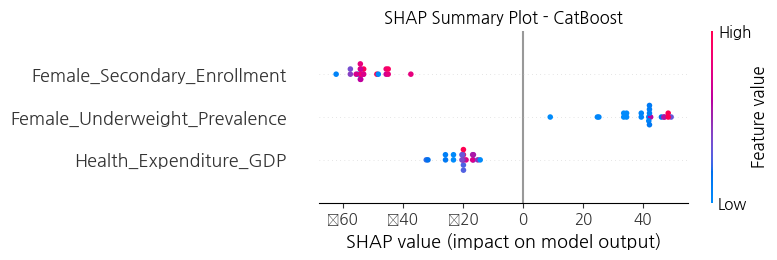

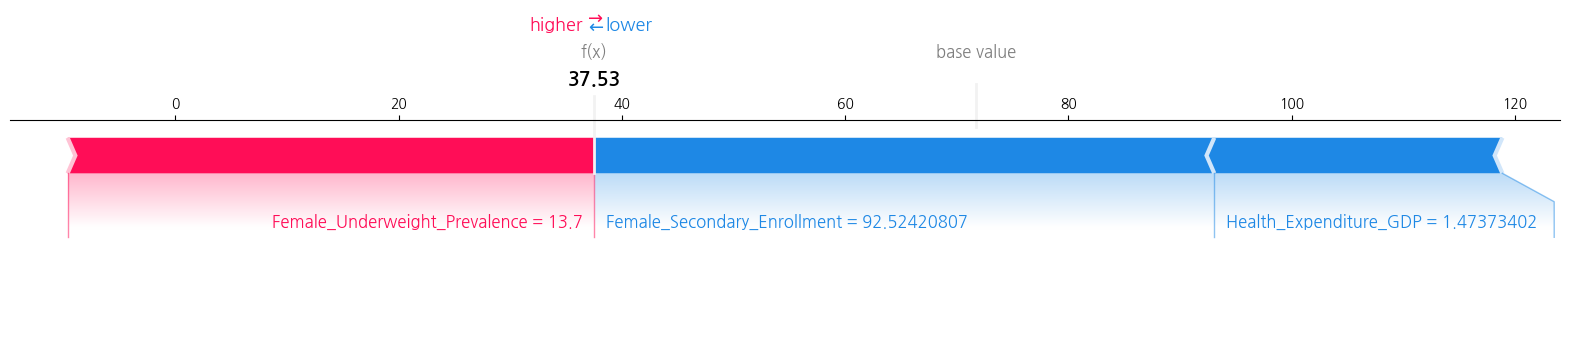

In [ ]:
import shap
import matplotlib.pyplot as plt

# 1. TreeExplainer ÏÉùÏÑ±
explainer = shap.TreeExplainer(cat_model)

# 2. SHAP Í∞í Í≥ÑÏÇ∞
shap_values = explainer.shap_values(X_test)

# 3. Ï†ÑÏ≤¥ Î≥ÄÏàò Ï§ëÏöîÎèÑ + ÏòÅÌñ• Î∞©Ìñ• ÏãúÍ∞ÅÌôî
plt.title("SHAP Summary Plot - CatBoost")
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# 4. Í∞úÎ≥Ñ ÏòàÏ∏° Ìï¥ÏÑù (Ïòà: ÌÖåÏä§Ìä∏ÏÖã Ï≤´ Î≤àÏß∏ ÏÉòÌîå)
shap.force_plot(
    explainer.expected_value,
    shap_values[0,:],
    X_test.iloc[0,:],
    matplotlib=True
)
plt.show()

YÏ∂ï: Î≥ÄÏàòÎ™Ö (Ï§ëÏöîÎèÑ ÏàúÏÑú)

Female_Secondary_Enrollment ‚Üí Í∞ÄÏû• ÏòÅÌñ•Î†•Ïù¥ ÌÅº

Female_Underweight_Prevalence

Health_Expenditure_GDP

XÏ∂ï: SHAP value (Î™®Îç∏ Ï∂úÎ†•Ïóê ÎØ∏Ïπú ÏòÅÌñ• ÌÅ¨Í∏∞)

Ïò§Î•∏Ï™Ω(+): Î™©ÌëúÍ∞í(Ïó¨Í∏∞ÏÑúÎäî ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†)ÏùÑ ÎÜíÏù¥Îäî Î∞©Ìñ•

ÏôºÏ™Ω(‚àí): Î™©ÌëúÍ∞íÏùÑ ÎÇÆÏ∂îÎäî Î∞©Ìñ•

Ï†ê ÏÉâÍπî: Ìï¥Îãπ Î≥ÄÏàò Í∞íÏùò ÌÅ¨Í∏∞

Îπ®Í∞ï(High): Í∞íÏù¥ ÎÜíÏùå

ÌååÎûë(Low): Í∞íÏù¥ ÎÇÆÏùå

üîç Î≥ÄÏàòÎ≥Ñ Ìå®ÌÑ¥
Female_Secondary_Enrollment

Í∞íÏù¥ ÎÜíÏùÑÏàòÎ°ù(Îπ®Í∞ï) ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†ÏùÑ ÎÇÆÏ∂îÎäî Í≤ΩÌñ•(ÏôºÏ™ΩÏúºÎ°ú Ïù¥Îèô)

Í∞íÏù¥ ÎÇÆÏùÑÏàòÎ°ù(ÌååÎûë) ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†ÏùÑ ÎÜíÏù¥Îäî Í≤ΩÌñ•(Ïò§Î•∏Ï™Ω Ïù¥Îèô)

Female_Underweight_Prevalence

Í∞íÏù¥ ÎÜíÏúºÎ©¥(Îπ®Í∞ï) ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†ÏùÑ ÎÜíÏù¥Îäî Ï™Ω(Ïò§Î•∏Ï™Ω)ÏúºÎ°ú Í∞ïÌïòÍ≤å ÏûëÏö©

Í∞íÏù¥ ÎÇÆÏúºÎ©¥(ÌååÎûë) ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†ÏùÑ ÎÇÆÏ∂îÎäî Ï™Ω(ÏôºÏ™Ω)ÏúºÎ°ú Ïù¥Îèô

Health_Expenditure_GDP

GDP ÎåÄÎπÑ Í±¥Í∞ï ÏßÄÏ∂úÏù¥ ÎÜíÏúºÎ©¥(Îπ®Í∞ï) ÏÇ¨ÎßùÎ•†ÏùÑ ÎÇÆÏ∂îÎäî Í≤ΩÌñ•(ÏôºÏ™Ω)

ÎÇÆÏúºÎ©¥(ÌååÎûë) ÏÇ¨ÎßùÎ•†ÏùÑ ÎÜíÏù¥Îäî Í≤ΩÌñ•(Ïò§Î•∏Ï™Ω)




üìä Ï¢ÖÌï© Ïù∏ÏÇ¨Ïù¥Ìä∏
Ïó¨ÏÑ± ÍµêÏú°Î•†Ïù¥ Í∞ÄÏû• Ï§ëÏöîÌïú Î≥ÄÏàòÏù¥Î©∞, Ï†ÄÏ≤¥Ï§ë Ïú†Î≥ëÎ•†Í≥º Í±¥Í∞ï ÏßÄÏ∂ú ÎπÑÏú®Ïù¥ Í∑∏ Îã§ÏùåÏúºÎ°ú ÏòÅÌñ•Î†• ÌÅº.

ÍµêÏú°Î•†‚Üë + Ï†ÄÏ≤¥Ï§ëÏú®‚Üì + Í±¥Í∞ï ÏßÄÏ∂ú‚Üë Ï°∞Ìï©ÏùºÏàòÎ°ù ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†Ïù¥ ÎÇÆÏïÑÏßÄÎäî Ìå®ÌÑ¥Ïù¥ ÎöúÎ†∑Ìï®.

Î∞úÌëú ÎïåÎäî ‚ÄúÎ≥ÄÏàòÍ∞íÍ≥º ÏòàÏ∏° Î∞©Ìñ•Ïù¥ ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú ÏùºÏπòÌïúÎã§‚ÄùÎäî Ï†êÏùÑ Í∞ïÏ°∞ÌïòÎ©¥ ÏÑ§ÎìùÎ†•Ïù¥ Ïª§Ïßê.


-------

f(x) = 37.53
‚Üí CatBoostÍ∞Ä Ïù¥ ÏÉòÌîåÏóê ÎåÄÌï¥ ÏòàÏ∏°Ìïú Î™©ÌëúÍ∞í(Ïó¨Í∏∞ÏÑúÎäî Maternal_Mortality_RatioÎùºÍ≥† Í∞ÄÏ†ï)Ïù¥ 37.53Ïù¥ÎùºÎäî Îúª.

base value
‚Üí Î™®Îç∏Ïù¥ ÏïÑÎ¨¥ Ï†ïÎ≥¥ ÏóÜÏù¥ ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÏòàÏ∏°ÌïòÎäî Í∞í(Î™®Îç∏Ïùò Í∏∞Î≥∏ Í∏∞Ï§ÄÏÑ†).
Ïó¨Í∏∞ÏÑúÎäî ÎåÄÎûµ 70~75 ÏÇ¨Ïù¥Î°ú Î≥¥ÏûÑ.

Îπ®Í∞ÑÏÉâ(positive ÏòÅÌñ•)
‚Üí ÏòàÏ∏°Í∞íÏùÑ Í∏∞Î≥∏Í∞íÎ≥¥Îã§ ÎÜíÏù¥Îäî Î∞©Ìñ•ÏúºÎ°ú ÏûëÏö©Ìïú Î≥ÄÏàò

Female_Underweight_Prevalence = 13.7
‚Üí Ïù¥ Í∞íÏù¥ ÎÜíÏïÑÏßÄÎ©¥ Maternal_Mortality_RatioÍ∞Ä Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏñ¥ÏÑú ÏòàÏ∏°ÏπòÎ•º Ïò¨Î¶º.

ÌååÎûÄÏÉâ(negative ÏòÅÌñ•)
‚Üí ÏòàÏ∏°Í∞íÏùÑ ÎÇÆÏ∂îÎäî Î∞©Ìñ•ÏúºÎ°ú ÏûëÏö©Ìïú Î≥ÄÏàò

Female_Secondary_Enrollment = 92.52
‚Üí Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•†Ïù¥ ÎÜíÏïÑÏÑú ÏÇ∞Î™® ÏÇ¨ÎßùÎ•† ÏòàÏ∏°ÏùÑ ÎÇÆÏ∂îÎäî Î∞©Ìñ•ÏúºÎ°ú ÏûëÏö©.

Health_Expenditure_GDP = 1.47
‚Üí GDP ÎåÄÎπÑ Î≥¥Í±¥ ÏßÄÏ∂úÏù¥ ÎÜíÏùÑÏàòÎ°ù ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†Ïù¥ ÎÇÆÏïÑÏßÄÎäî Ìå®ÌÑ¥ÏùÑ Î∞òÏòÅ.

üìä Ï¢ÖÌï©
Ïù¥ ÏÉòÌîåÏùò Í≤ΩÏö∞

Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Ïú†Î≥ëÎ•†Ïù¥ ÎÜíÏïÑÏÑú ÏÇ¨ÎßùÎ•†ÏùÑ ÎÅåÏñ¥Ïò¨Î¶º(Ï£ºÏöî ÏúÑÌóò ÏöîÏù∏).

ÌïòÏßÄÎßå Ïó¨ÏÑ± ÍµêÏú°Î•†Ïù¥ ÎÜíÍ≥†, Í±¥Í∞ï ÏßÄÏ∂ú ÎπÑÏú®ÎèÑ ÎÜíÏïÑÏÑú ÏÇ¨ÎßùÎ•†ÏùÑ ÏÉÅÎãπÌûà ÎÇÆÏ∂îÎäî Ìö®Í≥ºÎ•º ÎÉÑ.

ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Î™®Îç∏ÏùÄ ÌèâÍ∑†ÏπòÎ≥¥Îã§ Ìõ®Ïî¨ ÎÇÆÏùÄ 37.53ÏùÑ ÏòàÏ∏°.

Íµ∞Ïßë Î∂ÑÏÑù (K-means)

- 4Í∞ú Î≥ÄÏàò(Î™®ÏÑ± ÏÇ¨ÎßùÎ•†, ÏùòÎ£å ÏßÄÏ∂ú, Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•†, Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Ïú†Î≥ëÎ•†) ÏÇ¨Ïö©

- StandardScalerÎ°ú ÌëúÏ§ÄÌôî

- ÏóòÎ≥¥Ïö∞ Í∏∞Î≤ï(Inertia) + Ïã§Î£®Ïó£ Ï†êÏàòÎ°ú ÏµúÏ†Å K Í≤∞Ï†ï

- KMeansÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ‚Üí Í∞Å Íµ≠Í∞ÄÏóê ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≤àÌò∏ Î∂ÄÏó¨

- PCAÎ°ú 2Ï∞®Ïõê Ï∂ïÏÜåÌï¥ ÏãúÍ∞ÅÌôî

- ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†¬∑ÌëúÏ§ÄÌé∏Ï∞®¬∑ÏµúÏÜå¬∑ÏµúÎåÄÍ∞í Î∂ÑÏÑù

- ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏßï Ìï¥ÏÑù (ÎÜíÏùå/Î≥¥ÌÜµ/ÎÇÆÏùå Íµ¨Í∞Ñ ÎÇòÎàî)


ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∂ÑÏÑù

=== ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ===
ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (108, 4)
ÏÇ¨Ïö© Î≥ÄÏàò: ['Maternal_Mortality_Ratio', 'Health_Expenditure_GDP', 'Female_Secondary_Enrollment', 'Female_Underweight_Prevalence']

Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (108, 4)

=== Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ ===
Ïä§ÏºÄÏùºÎßÅ ÏôÑÎ£å
Ïä§ÏºÄÏùºÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ:
       Maternal_Mortality_Ratio  Health_Expenditure_GDP  \
count              1.080000e+02            1.080000e+02   
mean              -6.990293e-17           -2.487722e-16   
std                1.004662e+00            1.004662e+00   
min               -6.949676e-01           -1.569733e+00   
25%               -6.399899e-01           -7.366602e-01   
50%               -4.989602e-01           -2.149427e-01   
75%                3.010051e-03            5.903667e-01   
max                3.569389e+00            3.050108e+00   

       Female_Secondary_Enrollment  Female_Underweight_Prevalence  
c

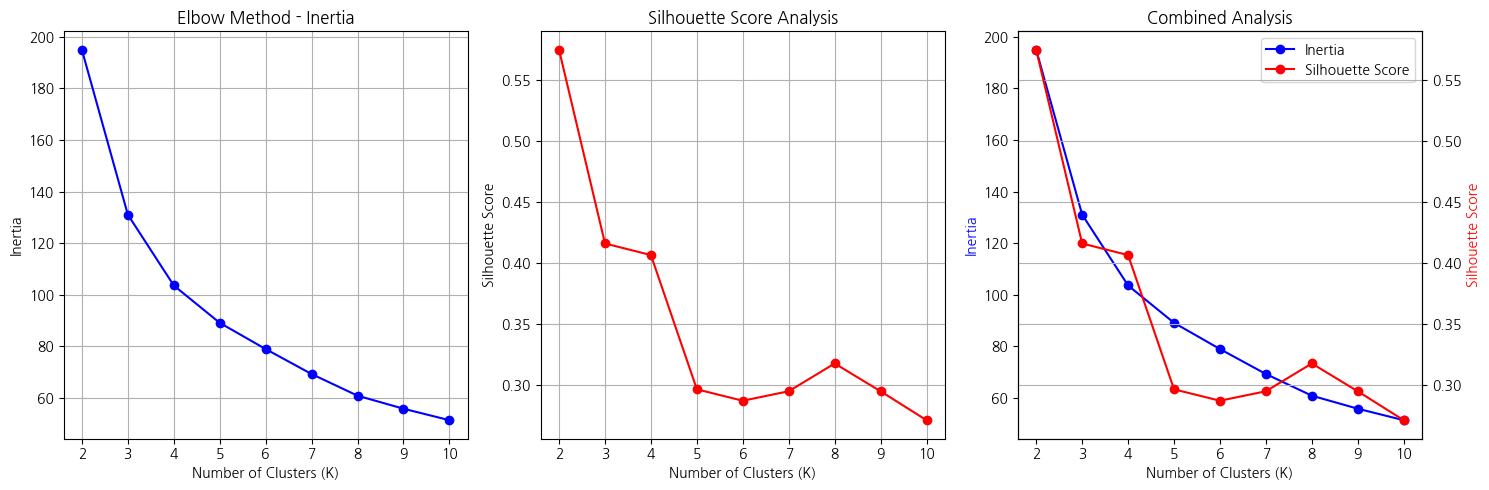


ÏµúÏ†Å KÍ∞í: 2 (Ïã§Î£®Ïó£ Ï†êÏàò Í∏∞Î∞ò)

=== K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (K=2) ===
ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏôÑÎ£å - Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Íµ≠Í∞Ä Ïàò:
Cluster
0    86
1    22
Name: count, dtype: int64

=== PCAÎ•º Ïù¥Ïö©Ìïú 2Ï∞®Ïõê ÏãúÍ∞ÅÌôî ===


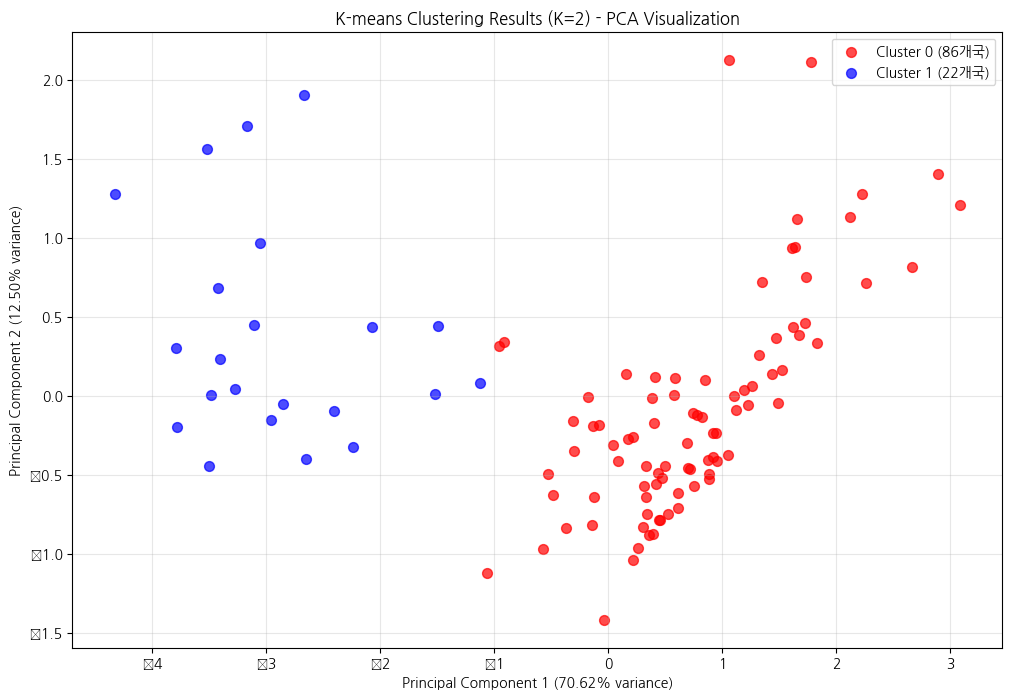


=== Íµ≠Í∞ÄÎ≥Ñ ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≤àÌò∏ ===
                  Country_Name  Cluster
                       Albania        0
                     Argentina        0
                     Australia        0
                       Austria        0
                      Barbados        0
                       Bahrain        0
                       Belgium        0
                       Belarus        0
                       Bolivia        0
                        Brazil        0
                        Belize        0
                        Bhutan        0
             Brunei Darussalam        0
                      Bulgaria        0
                        Canada        0
                    Cabo Verde        0
            Dominican Republic        0
                       Ecuador        0
                      Colombia        0
                         Chile        0
                    Costa Rica        0
                       Croatia        0
                        Cyprus        0
 

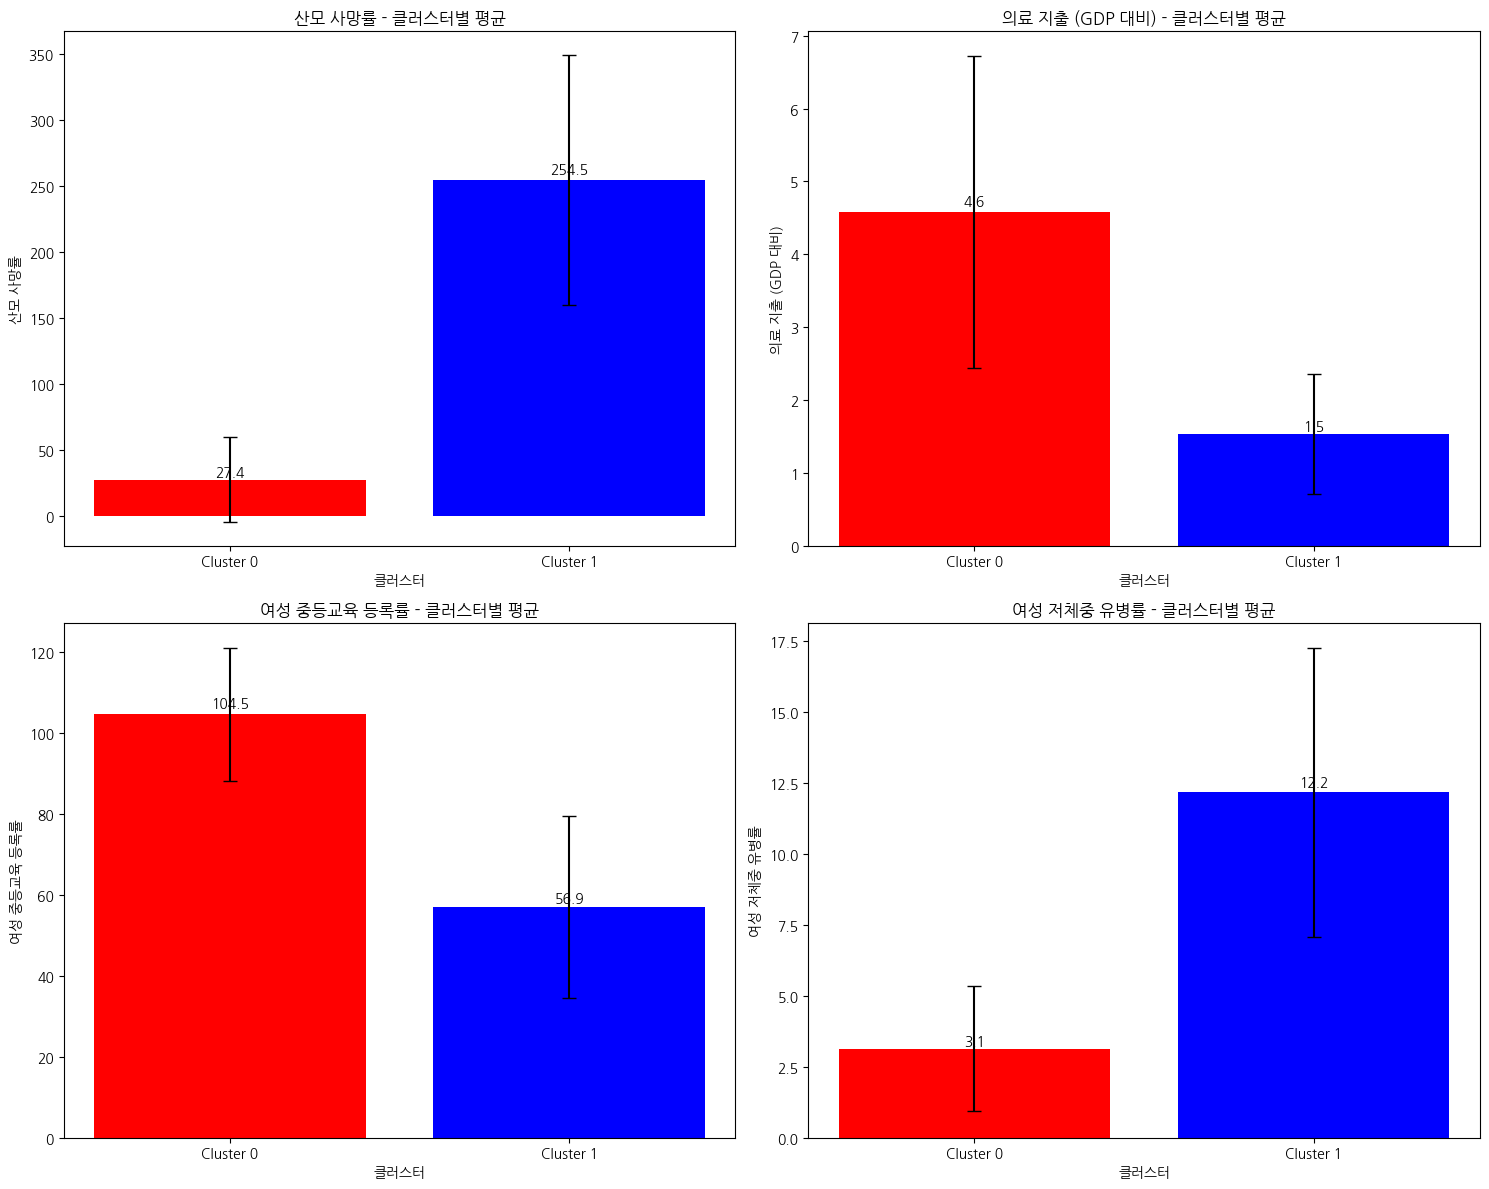


=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù ===

--- ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 Î∂ÑÏÑù ---
Íµ≠Í∞Ä Ïàò: 86Í∞ú
ÎåÄÌëú Íµ≠Í∞ÄÎì§: Albania, Argentina, Australia, Austria, Bahrain
ÌèâÍ∑† ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†: 27.4
ÌèâÍ∑† ÏùòÎ£å ÏßÄÏ∂ú: 4.58%
ÌèâÍ∑† Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•†: 104.5%
ÌèâÍ∑† Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Ïú†Î≥ëÎ•†: 3.1%

--- ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 Î∂ÑÏÑù ---
Íµ≠Í∞Ä Ïàò: 22Í∞ú
ÎåÄÌëú Íµ≠Í∞ÄÎì§: Angola, Bangladesh, Burkina Faso, Cameroon, Djibouti
ÌèâÍ∑† ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†: 254.5
ÌèâÍ∑† ÏùòÎ£å ÏßÄÏ∂ú: 1.53%
ÌèâÍ∑† Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•†: 56.9%
ÌèâÍ∑† Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Ïú†Î≥ëÎ•†: 12.2%

=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏßï ÏöîÏïΩ ===
ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†Í∞í:
         Maternal_Mortality_Ratio  Health_Expenditure_GDP  \
Cluster                                                     
0                           27.42                    4.58   
1                          254.55                    1.53   

         Female_Secondary_Enrollment  Female_Underweight_Prevalence  
Cluster                                                   

In [ ]:

# ============================================================================
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∂ÑÏÑù ÏãúÏûë
# ============================================================================

print("\n" + "="*60)
print("ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∂ÑÏÑù")
print("="*60)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ===")

# ÌïÑÏöîÌïú Î≥ÄÏàòÎßå ÏÑ†ÌÉù (4Í∞ú: ÏÇ¨ÎßùÎ•†, ÏßÄÏ∂ú, ÍµêÏú°Î•†, Ï†ÄÏ≤¥Ï§ë)
cluster_data = merged_data_clean[['Maternal_Mortality_Ratio', 'Health_Expenditure_GDP',
                                 'Female_Secondary_Enrollment', 'Female_Underweight_Prevalence']].copy()

print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {cluster_data.shape}")
print(f"ÏÇ¨Ïö© Î≥ÄÏàò: {list(cluster_data.columns)}")

# Í≤∞Ï∏°Ïπò ÌôïÏù∏ Î∞è Ï†úÍ±∞
print(f"\nÍ≤∞Ï∏°Ïπò Í∞úÏàò: {cluster_data.isnull().sum().sum()}")
cluster_data = cluster_data.dropna()
print(f"Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {cluster_data.shape}")

# Ïä§ÏºÄÏùºÎßÅ (StandardScaler ÏÇ¨Ïö©)
print("\n=== Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ ===")
scaler_cluster = StandardScaler()
cluster_data_scaled = scaler_cluster.fit_transform(cluster_data)
cluster_data_scaled_df = pd.DataFrame(cluster_data_scaled, columns=cluster_data.columns)

# üëâ Ïù∏Îç±Ïä§ Ïú†ÏßÄÌï¥ÏÑú ÎùºÎ≤® Î∂ÄÏ∞© Ïãú Í∏∏Ïù¥/Ï†ïÎ†¨ Î¨∏Ï†ú Î∞©ÏßÄ
cluster_data_scaled_df = pd.DataFrame(cluster_data_scaled,
                                      columns=cluster_data.columns,
                                      index=cluster_data.index)
print("Ïä§ÏºÄÏùºÎßÅ ÏôÑÎ£å")
print("Ïä§ÏºÄÏùºÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ:")
print(cluster_data_scaled_df.describe())


# ÏÉòÌîå Ïàò ÎåÄÎπÑ K ÏïàÏ†Ñ Î≤îÏúÑ
max_k = max(2, min(10, len(cluster_data) - 1))
K_range = range(2, max_k + 1)



# KÍ∞í ÏÑ†ÌÉù - ÏóòÎ≥¥Ïö∞ Í∏∞Î≤ï
print("\n=== ÏóòÎ≥¥Ïö∞ Í∏∞Î≤ïÏúºÎ°ú ÏµúÏ†Å KÍ∞í Ï∞æÍ∏∞ ===")

inertias = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_data_scaled)
    inertias.append(kmeans.inertia_)

    # Ïã§Î£®Ïó£ Ï†êÏàò Í≥ÑÏÇ∞
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(cluster_data_scaled, labels)
    silhouette_scores.append(silhouette_avg)

    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={silhouette_avg:.3f}")

# ÏóòÎ≥¥Ïö∞ Í≥°ÏÑ† ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 5))

# Inertia Í≥°ÏÑ†
plt.subplot(1, 3, 1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')
plt.grid(True)

# Ïã§Î£®Ïó£ Ï†êÏàò Í≥°ÏÑ†
plt.subplot(1, 3, 2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.grid(True)

# Ïã§Î£®Ïó£ Ï†êÏàòÏôÄ Inertia Í≤∞Ìï©
plt.subplot(1, 3, 3)
ax1 = plt.gca()
ax2 = ax1.twinx()

line1 = ax1.plot(K_range, inertias, 'bo-', label='Inertia')
line2 = ax2.plot(K_range, silhouette_scores, 'ro-', label='Silhouette Score')

ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia', color='b')
ax2.set_ylabel('Silhouette Score', color='r')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.title('Combined Analysis')
plt.grid(True)

plt.tight_layout()
plt.savefig('elbow_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ÏµúÏ†Å KÍ∞í ÏÑ†ÌÉù
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nÏµúÏ†Å KÍ∞í: {optimal_k} (Ïã§Î£®Ïó£ Ï†êÏàò Í∏∞Î∞ò)")

# K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ïã§Ìñâ
print(f"\n=== K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (K={optimal_k}) ===")
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(cluster_data_scaled)

# üëâ Ïù∏Îç±Ïä§Î•º Ïú†ÏßÄÌïú Ï±Ñ Í≤∞Í≥º Î∂ôÏù¥Í∏∞
cluster_results = merged_data_clean.loc[cluster_data_scaled_df.index].copy()
cluster_results['Cluster'] = cluster_labels


# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥ºÎ•º ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïóê Ï∂îÍ∞Ä
cluster_results = merged_data_clean.copy()
cluster_results['Cluster'] = cluster_labels

print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏôÑÎ£å - Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Íµ≠Í∞Ä Ïàò:")
print(cluster_results['Cluster'].value_counts().sort_index())

# PCAÎ•º Ïù¥Ïö©Ìïú 2Ï∞®Ïõê Ï∂ïÏÜå Î∞è ÏãúÍ∞ÅÌôî
print("\n=== PCAÎ•º Ïù¥Ïö©Ìïú 2Ï∞®Ïõê ÏãúÍ∞ÅÌôî ===")

pca = PCA(n_components=2)
cluster_data_pca = pca.fit_transform(cluster_data_scaled)

# PCA Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
cluster_results['PCA1'] = cluster_data_pca[:, 0]
cluster_results['PCA2'] = cluster_data_pca[:, 1]

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i in range(optimal_k):
    cluster_data = cluster_results[cluster_results['Cluster'] == i]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'],
                c=colors[i], label=f'Cluster {i} ({len(cluster_data)}Í∞úÍµ≠)', alpha=0.7, s=50)

plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title(f'K-means Clustering Results (K={optimal_k}) - PCA Visualization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('cluster_visualization_pca.png', dpi=300, bbox_inches='tight')
plt.show()

# Íµ≠Í∞ÄÎ≥Ñ ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≤àÌò∏ Ï∂úÎ†•
print("\n=== Íµ≠Í∞ÄÎ≥Ñ ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≤àÌò∏ ===")
country_cluster = cluster_results[['Country_Name', 'Cluster']].sort_values('Cluster')
print(country_cluster.to_string(index=False))

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏßï Î∂ÑÏÑù
print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏßï Î∂ÑÏÑù ===")

cluster_analysis = cluster_results.groupby('Cluster').agg({
    'Maternal_Mortality_Ratio': ['mean', 'std', 'min', 'max'],
    'Health_Expenditure_GDP': ['mean', 'std', 'min', 'max'],
    'Female_Secondary_Enrollment': ['mean', 'std', 'min', 'max'],
    'Female_Underweight_Prevalence': ['mean', 'std', 'min', 'max']
}).round(2)

print("ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌÜµÍ≥Ñ:")
print(cluster_analysis)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏßï ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
variables = ['Maternal_Mortality_Ratio', 'Health_Expenditure_GDP',
            'Female_Secondary_Enrollment', 'Female_Underweight_Prevalence']
variable_names = ['ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†', 'ÏùòÎ£å ÏßÄÏ∂ú (GDP ÎåÄÎπÑ)', 'Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•†', 'Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Ïú†Î≥ëÎ•†']

for i, (var, name) in enumerate(zip(variables, variable_names)):
    row = i // 2
    col = i % 2

    cluster_means = cluster_results.groupby('Cluster')[var].mean()
    cluster_stds = cluster_results.groupby('Cluster')[var].std()

    bars = axes[row, col].bar(range(len(cluster_means)), cluster_means,
                              yerr=cluster_stds, capsize=5, color=colors[:len(cluster_means)])
    axes[row, col].set_xlabel('ÌÅ¥Îü¨Ïä§ÌÑ∞')
    axes[row, col].set_ylabel(name)
    axes[row, col].set_title(f'{name} - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†')
    axes[row, col].set_xticks(range(len(cluster_means)))
    axes[row, col].set_xticklabels([f'Cluster {i}' for i in range(len(cluster_means))])

    # Í∞í ÌëúÏãú
    for bar, mean_val in zip(bars, cluster_means):
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                           f'{mean_val:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('cluster_characteristics.png', dpi=300, bbox_inches='tight')
plt.show()

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù
print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù ===")

for cluster_id in range(optimal_k):
    cluster_countries = cluster_results[cluster_results['Cluster'] == cluster_id]

    print(f"\n--- ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id} Î∂ÑÏÑù ---")
    print(f"Íµ≠Í∞Ä Ïàò: {len(cluster_countries)}Í∞ú")
    print(f"ÎåÄÌëú Íµ≠Í∞ÄÎì§: {', '.join(cluster_countries['Country_Name'].head(5).tolist())}")

    print(f"ÌèâÍ∑† ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†: {cluster_countries['Maternal_Mortality_Ratio'].mean():.1f}")
    print(f"ÌèâÍ∑† ÏùòÎ£å ÏßÄÏ∂ú: {cluster_countries['Health_Expenditure_GDP'].mean():.2f}%")
    print(f"ÌèâÍ∑† Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•†: {cluster_countries['Female_Secondary_Enrollment'].mean():.1f}%")
    print(f"ÌèâÍ∑† Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Ïú†Î≥ëÎ•†: {cluster_countries['Female_Underweight_Prevalence'].mean():.1f}%")

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏßï ÏöîÏïΩ
print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏßï ÏöîÏïΩ ===")

cluster_summary = cluster_results.groupby('Cluster').agg({
    'Maternal_Mortality_Ratio': 'mean',
    'Health_Expenditure_GDP': 'mean',
    'Female_Secondary_Enrollment': 'mean',
    'Female_Underweight_Prevalence': 'mean'
}).round(2)

print("ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†Í∞í:")
print(cluster_summary)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏßï Ìï¥ÏÑù
print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏßï Ìï¥ÏÑù ===")

for cluster_id in range(optimal_k):
    cluster_data = cluster_summary.loc[cluster_id]

    print(f"\nÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id}:")
    if cluster_data['Maternal_Mortality_Ratio'] < 50:
        mortality_level = "ÎÇÆÏùå"
    elif cluster_data['Maternal_Mortality_Ratio'] < 200:
        mortality_level = "Î≥¥ÌÜµ"
    else:
        mortality_level = "ÎÜíÏùå"

    if cluster_data['Health_Expenditure_GDP'] < 3:
        health_level = "ÎÇÆÏùå"
    elif cluster_data['Health_Expenditure_GDP'] < 6:
        health_level = "Î≥¥ÌÜµ"
    else:
        health_level = "ÎÜíÏùå"

    print(f"  - ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†: {mortality_level} ({cluster_data['Maternal_Mortality_Ratio']:.1f})")
    print(f"  - ÏùòÎ£å ÏßÄÏ∂ú: {health_level} ({cluster_data['Health_Expenditure_GDP']:.2f}%)")
    print(f"  - Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•†: {cluster_data['Female_Secondary_Enrollment']:.1f}%")
    print(f"  - Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Ïú†Î≥ëÎ•†: {cluster_data['Female_Underweight_Prevalence']:.1f}%")

print("\n" + "="*60)
print("ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∂ÑÏÑù ÏôÑÎ£å")
print("="*60)


ÎîîÌÖåÏùº Ìè¨Ïù∏Ìä∏
Í∑∏ÎûòÌîÑÏùò Ïò§Ï∞®ÎßâÎåÄ(ÌëúÏ§ÄÌé∏Ï∞®)Îäî ÌäπÌûà Cluster 1Ïùò ÏÇ¨ÎßùÎ•†ÏóêÏÑú ÌÅº ‚Üí Ïù¥ÏßàÏÑ±Ïù¥ Ïª§ÏÑú (ÏïÑÏ£º Ïó¥ÏïÖÌïú Íµ≠Í∞ÄÎ∂ÄÌÑ∞ Ï§ëÍ∞ÑÏàòÏ§ÄÍπåÏßÄ) ÏÑûÏó¨ ÏûàÏùå.

Îì±Î°ùÎ•†Ïù¥ 100% Ï¥àÍ≥ºÏù∏ Í±¥ ÏßÄÌëúÍ∞Ä **gross(Î™ÖÎ™©)**Îùº ÌïôÎ†π Ï¥àÍ≥º¬∑Ï§ëÎ≥µ Ïû¨ÌïôÏù¥ Ìè¨Ìï®ÎèºÏÑú Í∞ÄÎä•.

Î¨¥ÏóáÏùÑ ÎßêÌï¥Ï£ºÎÇò
ÍµêÏú°(‚Üë), Î≥¥Í±¥ÏßÄÏ∂ú(‚Üë), ÏòÅÏñëÏÉÅÌÉú(Ï†ÄÏ≤¥Ï§ë‚Üì)Í∞Ä ÎèôÏãúÏóê Ï¢ãÏïÑÏßÄÎ©¥ Î™®ÏÑ± ÏÇ¨ÎßùÎ•†Ïù¥ ÎÇÆÎã§Îäî Ìå®ÌÑ¥Ïù¥ Íµ∞Ïßë ÏàòÏ§ÄÏóêÏÑúÎèÑ ÎöúÎ†∑.

Ï†ïÏ±ÖÏ†ÅÏúºÎ°ú Cluster 1ÏóêÏÑ† Î≥¥Í±¥ Ïû¨Ï†ï ÌôïÎåÄ + Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Ï†ëÍ∑º + ÏòÅÏñëÍ∞úÏûÖÏù¥ Ïö∞ÏÑ†ÏàúÏúÑ.

Îã§Ïùå Ï≤¥ÌÅ¨(ÏßßÍ≤å)
Cluster 1Ïùò Î∂ÑÏÇ∞Ïù¥ Ïª§ÏÑú K=3ÎèÑ ÏãúÌóòÌï¥ ÏÑúÎ∏åÍµ∞(Ïòà: ‚ÄúÏßÄÏ∂úÏùÄ ÎÜíÏßÄÎßå ÏÑ±Í≥º ÎÇÆÏùÄ ÎπÑÌö®Ïú®Íµ∞‚Äù)Ïù¥ ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÎ©¥ Ï¢ãÏïÑ.

Ïó∞ÎèÑ Î∞îÍøî **ÏïàÏ†ïÏÑ±(temporal stability)**ÎèÑ ÌïúÎ≤à Í≤ÄÏ¶ùÌïòÎ©¥ Î∞úÌëú Ïã†Î¢∞ÎèÑ ‚Üë.

üìä Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ

üîç Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Í≤∞Í≥º

Ï¥ù 108Í∞ú Íµ≠Í∞ÄÏùò 2016ÎÖÑ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

4Í∞ú Ï£ºÏöî Î≥ÄÏàò: ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†, ÏùòÎ£å ÏßÄÏ∂ú, Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•†, Ïó¨ÏÑ± Ï†ÄÏ≤¥Ï§ë Ïú†Î≥ëÎ•†

Í≤∞Ï∏°Ïπò Î∞è Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ ÏôÑÎ£å

- ÌöåÍ∑Ä Î∂ÑÏÑù Í≤∞Í≥º

Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê:

Linear Regression: R¬≤ = 0.3706 (ÏµúÍ≥† ÏÑ±Îä•)

Random Forest: R¬≤ = 0.3137

Gradient Boosting: R¬≤ = 0.2624

ÏùòÎ£å ÏßÄÏ∂úÏùò ÏòÅÌñ•:

Îã§Ï§ëÌöåÍ∑Ä Í≥ÑÏàò: 3.8361 (ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)

ÏùòÎ£å ÏßÄÏ∂úÏù¥ Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†Ïù¥ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•

Ïù¥Îäî ÏùòÎ£å ÏßÄÏ∂úÏù¥ ÎÜíÏùÄ Íµ≠Í∞ÄÏùºÏàòÎ°ù ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†Ïù¥ ÎÜíÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏

ÌäπÏÑ± Ï§ëÏöîÎèÑ:

Ïó¨ÏÑ± Ï§ëÎì±ÍµêÏú° Îì±Î°ùÎ•†Ïù¥ Í∞ÄÏû• Ï§ëÏöîÌïú ÏòàÏ∏° Î≥ÄÏàò (84-88%)

ÏùòÎ£å ÏßÄÏ∂úÏùÄ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Ï§ëÏöîÎèÑ (8-10%)

üéØ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∂ÑÏÑù Í≤∞Í≥º

ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: 2Í∞ú (Ïã§Î£®Ïó£ Ï†êÏàò Í∏∞Î∞ò)

ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 (86Í∞úÍµ≠) - ÏÑ†ÏßÑÍµ≠ Í∑∏Î£π:

ÌèâÍ∑† ÏÇ∞Î™® ÏÇ¨ÎßùÎ•†: 27

----

=== ÏÉÅÌò∏ÏûëÏö© OLS(HC3) ÏöîÏïΩ ===
                       coef  se(HC3)       t       p
Intercept           79.7766   8.7209  9.1477  0.0000
Enroll_c            -2.6893   0.3904 -6.8883  0.0000
Health_c            -8.8954   5.3119 -1.6746  0.0940
Underwt_c            4.4524   3.3364  1.3345  0.1820
Enroll_c:Health_c    0.5332   0.1067  4.9962  0.0000
Health_c:Underwt_c   1.2363   1.6505  0.7491  0.4538

[ÏãúÎÑàÏßÄ ÌåêÏ†ï] Œ≤_EH(Enroll√óHealth) = 0.5332, p = 0.0000
‚Üí ÏãúÎÑàÏßÄÍ∞Ä ÏïΩÌïòÍ±∞ÎÇò ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Î∂àÌôïÏã§.
ÏßÄÏ∂ú 1.5%ÏóêÏÑú 'ÍµêÏú° 1%p‚Üë'Ïùò ÏòàÏÉÅ MMR Î≥ÄÌôî: -3.49
ÏßÄÏ∂ú 3.0%ÏóêÏÑú 'ÍµêÏú° 1%p‚Üë'Ïùò ÏòàÏÉÅ MMR Î≥ÄÌôî: -2.69
ÏßÄÏ∂ú 4.5%ÏóêÏÑú 'ÍµêÏú° 1%p‚Üë'Ïùò ÏòàÏÉÅ MMR Î≥ÄÌôî: -1.89
ÏßÄÏ∂ú 6.0%ÏóêÏÑú 'ÍµêÏú° 1%p‚Üë'Ïùò ÏòàÏÉÅ MMR Î≥ÄÌôî: -1.09


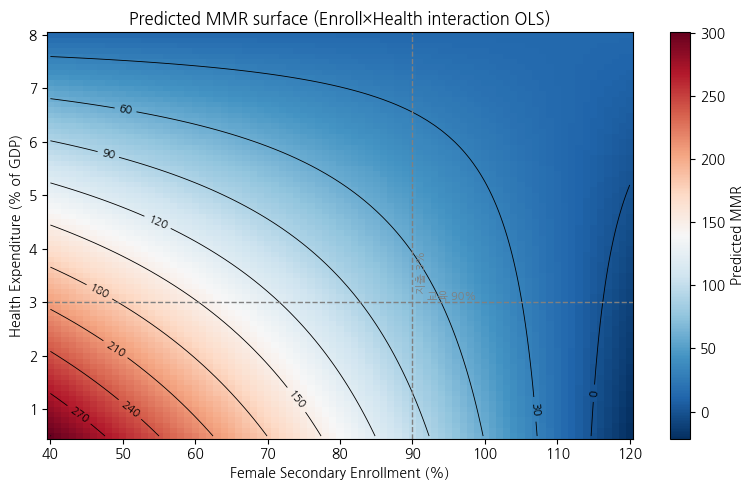

In [ ]:
# === OLS ÏÉÅÌò∏ÏûëÏö©(ÍµêÏú°√óÏßÄÏ∂ú) + 2D ÌûàÌä∏Îßµ : Î≥µÎ∂ô-Îã®ÏùºÏÖÄ ===
# Ï†ÑÏ†ú: merged_data_clean (cols: Maternal_Mortality_Ratio, Health_Expenditure_GDP,
#       Female_Secondary_Enrollment, Female_Underweight_Prevalence) Í∞Ä Ïù¥ÎØ∏ Ï°¥Ïû¨

# 0) ÏûÑÌè¨Ìä∏(+statsmodels ÏóÜÏúºÎ©¥ ÏÑ§Ïπò)
try:
    import numpy as np, pandas as pd, matplotlib.pyplot as plt
    import statsmodels.formula.api as smf
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "statsmodels", "-q"])
    import numpy as np, pandas as pd, matplotlib.pyplot as plt
    import statsmodels.formula.api as smf

df_int = merged_data_clean.copy()

# 1) ÏÑºÌÑ∞ÎßÅ(Ïª∑Ïò§ÌîÑ Ìï¥ÏÑùÏùÑ ÏâΩÍ≤å) ‚Äî ÏßÄÏ∂ú 3%, ÍµêÏú° 90%, Ï†ÄÏ≤¥Ï§ë 5% Í∏∞Ï§Ä
df_int['Health_c']  = df_int['Health_Expenditure_GDP'] - 3.0
df_int['Enroll_c']  = df_int['Female_Secondary_Enrollment'] - 90.0
df_int['Underwt_c'] = df_int['Female_Underweight_Prevalence'] - 5.0

# 2) ÏÉÅÌò∏ÏûëÏö© Ìè¨Ìï® OLS(Í≤¨Í≥†ÌëúÏ§ÄÏò§Ï∞® HC3)
formula = """
Maternal_Mortality_Ratio ~ Enroll_c + Health_c + Underwt_c
                          + Enroll_c:Health_c + Health_c:Underwt_c
"""
ols_int = smf.ols(formula, data=df_int).fit(cov_type="HC3")

# 3) ÏöîÏïΩ Ï∂úÎ†•(Í≥ÑÏàò/SE/t/p)
tbl = pd.DataFrame({
    'coef': ols_int.params,
    'se(HC3)': ols_int.bse,
    't': ols_int.tvalues,
    'p': ols_int.pvalues
}).loc[['Intercept','Enroll_c','Health_c','Underwt_c','Enroll_c:Health_c','Health_c:Underwt_c']].round(4)
print("=== ÏÉÅÌò∏ÏûëÏö© OLS(HC3) ÏöîÏïΩ ===")
print(tbl)

# 4) ÏãúÎÑàÏßÄ ÌåêÏ†ï + ÌïúÍ≥ÑÌö®Í≥º(ÏßÄÏ∂ú ÏàòÏ§ÄÎ≥Ñ 'ÍµêÏú° 1%p‚Üë'Ïùò MMR Î≥ÄÌôî)
beta = ols_int.params['Enroll_c:Health_c']
pval = ols_int.pvalues['Enroll_c:Health_c']
print(f"\n[ÏãúÎÑàÏßÄ ÌåêÏ†ï] Œ≤_EH(Enroll√óHealth) = {beta:.4f}, p = {pval:.4f}")
if (beta < 0) and (pval < 0.05):
    print("‚Üí ÏßÄÏ∂úÏù¥ ÎÜíÏùÑÏàòÎ°ù 'ÍµêÏú° 1%p‚Üë'Ïùò MMR Í∞êÏÜåÌö®Í≥ºÍ∞Ä Îçî Ïª§ÏßÄÎäî ÏãúÎÑàÏßÄ Ï°¥Ïû¨.")
else:
    print("‚Üí ÏãúÎÑàÏßÄÍ∞Ä ÏïΩÌïòÍ±∞ÎÇò ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Î∂àÌôïÏã§.")

bE  = ols_int.params['Enroll_c']
bEH = ols_int.params['Enroll_c:Health_c']
def edu_effect_at(h):  # h: Î≥¥Í±¥ÏßÄÏ∂ú(% of GDP)
    return bE + bEH*(h - 3.0)

for h in [1.5, 3.0, 4.5, 6.0]:
    print(f"ÏßÄÏ∂ú {h:.1f}%ÏóêÏÑú 'ÍµêÏú° 1%p‚Üë'Ïùò ÏòàÏÉÅ MMR Î≥ÄÌôî: {edu_effect_at(h):.2f}")

# 5) 2D ÌûàÌä∏Îßµ(ÍµêÏú°√óÏßÄÏ∂ú) ‚Äî Ï†ÄÏ≤¥Ï§ëÏùÄ Ï§ëÏïôÍ∞í Í≥†Ï†ï
E_min = max(40, float(df_int['Female_Secondary_Enrollment'].min()))
E_max = min(120, float(df_int['Female_Secondary_Enrollment'].max()))
H_min = max(0.5, float(df_int['Health_Expenditure_GDP'].min()))
H_max = min(8.0, float(df_int['Health_Expenditure_GDP'].max()))

E = np.linspace(E_min, E_max, 81)   # ÍµêÏú°(%)
H = np.linspace(H_min, H_max, 76)   # ÏßÄÏ∂ú(% of GDP)
EE, HH = np.meshgrid(E, H)

X_pred = pd.DataFrame({
    'Enroll_c' : EE.ravel() - 90.0,
    'Health_c' : HH.ravel() - 3.0,
    'Underwt_c': np.full(EE.size, df_int['Underwt_c'].median())
})
X_pred['Enroll_c:Health_c']  = X_pred['Enroll_c'] * X_pred['Health_c']
X_pred['Health_c:Underwt_c'] = X_pred['Health_c'] * X_pred['Underwt_c']

Z = ols_int.predict(X_pred).values.reshape(HH.shape)

plt.figure(figsize=(8,5))
im = plt.pcolormesh(EE, HH, Z, shading='auto', cmap='RdBu_r')
cs = plt.contour(EE, HH, Z, colors='k', levels=10, linewidths=0.6)
plt.clabel(cs, inline=True, fontsize=8)
plt.axhline(3.0, color='gray', ls='--', lw=1)
plt.axvline(90.0, color='gray', ls='--', lw=1)
plt.text(92, 3.05, 'ÍµêÏú° 90%', fontsize=8, color='gray')
plt.text(90.5, 3.2, 'ÏßÄÏ∂ú 3%', fontsize=8, color='gray', rotation=90)
plt.xlabel('Female Secondary Enrollment (%)')
plt.ylabel('Health Expenditure (% of GDP)')
plt.title('Predicted MMR surface (Enroll√óHealth interaction OLS)')
cbar = plt.colorbar(im); cbar.set_label('Predicted MMR')
plt.tight_layout(); plt.show()


=== ÌûåÏßÄ ÌöåÍ∑Ä(ÏßÄÏ∂ú 3%) ‚Äî Í≥ÑÏàò ÏöîÏïΩ ===
                                   coef  se(HC3)       t       p
Intercept                      346.6459  83.2034  4.1662  0.0000
Health_Expenditure_GDP         -25.4613  27.2679 -0.9337  0.3504
Health_hinge_3p                 28.2669  28.6628  0.9862  0.3240
Female_Secondary_Enrollment     -2.4324   0.4809 -5.0584  0.0000
Female_Underweight_Prevalence    3.7639   3.5079  1.0730  0.2833

[Í∏∞Ïö∏Í∏∞ Ìï¥ÏÑù] ÏßÄÏ∂ú < 3%ÏóêÏÑú slope = -25.461  /  ÏßÄÏ∂ú ‚â• 3%ÏóêÏÑú slope = 2.806
[ÏûÑÍ≥ÑÌö®Í≥º Ïú†ÏùòÏÑ±] Health_hinge_3p (Í∏∞Ïö∏Í∏∞ Ï∞®Ïù¥) p = 0.3240


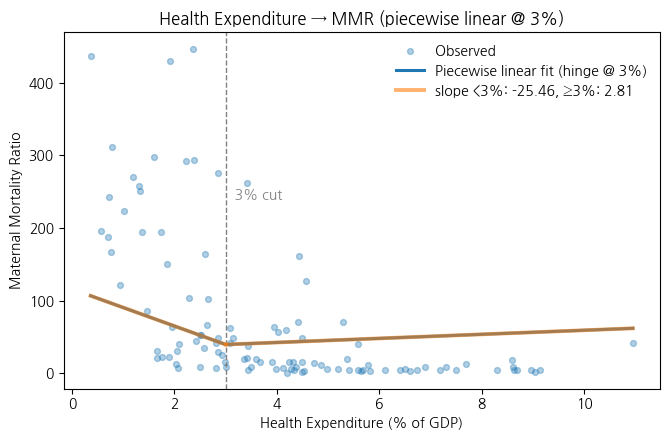


[Ïâ¨Ïö¥ Ìï¥ÏÑù]
- ÏßÄÏ∂úÏù¥ 3%Î≥¥Îã§ ÎÇÆÏùÑ Îïê, ÏßÄÏ∂úÏùÑ 1%p Ïò¨Î¶¥ Îïå MMRÏù¥ ÌèâÍ∑† 25.5ÎßåÌÅº Í∞êÏÜåÌï©ÎãàÎã§.
- ÏßÄÏ∂úÏù¥ 3% Ïù¥ÏÉÅÏóêÏÑ†, Í∞ôÏùÄ 1%p ÏÉÅÏäπÏóê MMRÏù¥ ÌèâÍ∑† 2.8ÎßåÌÅº Ï¶ùÍ∞ÄÌï©ÎãàÎã§.
- 'Í∏∞Ïö∏Í∏∞ Ï∞®Ïù¥(‚â•3% vs <3%)'Ïùò Ïú†ÏùòÏÑ± p=0.3240 ÏûÖÎãàÎã§.
‚Üí 3%Î•º Í∏∞Ï§ÄÏúºÎ°ú ÏßÄÏ∂úÏùò Ìö®Í≥ºÍ∞Ä Îã¨ÎùºÏßÄÎäîÏßÄ(ÏûÑÍ≥ÑÌö®Í≥º)Í∞Ä ÏúÑ ÌÜµÍ≥ÑÎ°ú ÌåêÏ†ïÎê©ÎãàÎã§.


In [ ]:
# === "ÏßÄÏ∂ú 3% ÏûÑÍ≥ÑÍ∞í" Í∞ïÏ†ú: ÌûåÏßÄ(Ï°∞Í∞ÅÏÑ†Ìòï) ÌöåÍ∑Ä Îã®ÏùºÏÖÄ ===
# Ï†ÑÏ†ú: merged_data_clean (cols: Maternal_Mortality_Ratio, Health_Expenditure_GDP,
#       Female_Secondary_Enrollment, Female_Underweight_Prevalence) Í∞Ä Ïù¥ÎØ∏ Ï°¥Ïû¨

import numpy as np, pandas as pd, matplotlib.pyplot as plt
import statsmodels.formula.api as smf

assert 'merged_data_clean' in globals(), "merged_data_clean Ïù¥ Î®ºÏ†Ä ÎßåÎì§Ïñ¥Ï†∏ ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§."

# 1) Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ + ÌûåÏßÄ Î≥ÄÌôò(ÏßÄÏ∂ú 3% Í∏∞Ï§Ä)
df = merged_data_clean.copy()
df = df[['Maternal_Mortality_Ratio','Health_Expenditure_GDP',
         'Female_Secondary_Enrollment','Female_Underweight_Prevalence']].dropna().astype(float)

df['Health_hinge_3p'] = np.clip(df['Health_Expenditure_GDP'] - 3.0, 0, None)  # max(Health-3, 0)
# Ìï¥ÏÑù Ìé∏ÏùòÎ•º ÏúÑÌïú Î≥¥Ï°∞(Ï§ëÏïôÍ∞í Í≥†Ï†ïÏö©)
E_med = float(df['Female_Secondary_Enrollment'].median())
U_med = float(df['Female_Underweight_Prevalence'].median())

# 2) Ï°∞Í∞ÅÏÑ†Ìòï OLS (ÏßÄÏ∂ú 3% Ïù¥Ï†Ñ/Ïù¥ÌõÑ Í∏∞Ïö∏Í∏∞ Íµ¨Î∂Ñ) + Í≤¨Í≥†ÌëúÏ§ÄÏò§Ï∞®(HC3)
#    slope(<3%) = Œ≤_H,  slope(‚â•3%) = Œ≤_H + Œ≤_hinge
formula = "Maternal_Mortality_Ratio ~ Health_Expenditure_GDP + Health_hinge_3p + Female_Secondary_Enrollment + Female_Underweight_Prevalence"
m_hinge = smf.ols(formula, data=df).fit(cov_type="HC3")

# 3) ÏöîÏïΩ Ï∂úÎ†•(ÌïµÏã¨ Í≥ÑÏàò + p)
summary_tbl = (pd.DataFrame({
    'coef': m_hinge.params,
    'se(HC3)': m_hinge.bse,
    't': m_hinge.tvalues,
    'p': m_hinge.pvalues
}).loc[['Intercept','Health_Expenditure_GDP','Health_hinge_3p','Female_Secondary_Enrollment','Female_Underweight_Prevalence']]
  .round(4))
print("=== ÌûåÏßÄ ÌöåÍ∑Ä(ÏßÄÏ∂ú 3%) ‚Äî Í≥ÑÏàò ÏöîÏïΩ ===")
print(summary_tbl)

bH  = m_hinge.params['Health_Expenditure_GDP']
bHg = m_hinge.params['Health_hinge_3p']
slope_below  = bH
slope_above  = bH + bHg
print(f"\n[Í∏∞Ïö∏Í∏∞ Ìï¥ÏÑù] ÏßÄÏ∂ú < 3%ÏóêÏÑú slope = {slope_below:.3f}  /  ÏßÄÏ∂ú ‚â• 3%ÏóêÏÑú slope = {slope_above:.3f}")
print(f"[ÏûÑÍ≥ÑÌö®Í≥º Ïú†ÏùòÏÑ±] Health_hinge_3p (Í∏∞Ïö∏Í∏∞ Ï∞®Ïù¥) p = {m_hinge.pvalues['Health_hinge_3p']:.4f}")

# 4) ÏòàÏ∏° Í≥°ÏÑ†(ÍµêÏú°¬∑Ï†ÄÏ≤¥Ï§ë Ï§ëÏïôÍ∞íÏóê Í≥†Ï†ïÌïú ÏÉÅÌÉúÏóêÏÑú ÏßÄÏ∂úÎßå Î≥ÄÌôî)
H_grid = np.linspace(df['Health_Expenditure_GDP'].min(), df['Health_Expenditure_GDP'].max(), 300)
grid = pd.DataFrame({
    'Health_Expenditure_GDP': H_grid,
    'Health_hinge_3p': np.clip(H_grid - 3.0, 0, None),
    'Female_Secondary_Enrollment': E_med,
    'Female_Underweight_Prevalence': U_med
})
pred = m_hinge.predict(grid)

# 5) ÏãúÍ∞ÅÌôî: ÏÇ∞Ï†ê + Ï°∞Í∞ÅÏÑ†Ìòï ÏòàÏ∏° + 3% ÏàòÏßÅÏÑ† + Íµ¨Í∞ÑÎ≥Ñ Í∏∞Ïö∏Í∏∞ Ï£ºÏÑù
plt.figure(figsize=(6.8,4.5))
plt.scatter(df['Health_Expenditure_GDP'], df['Maternal_Mortality_Ratio'], alpha=0.35, s=18, label='Observed')
plt.plot(H_grid, pred, lw=2.2, label='Piecewise linear fit (hinge @ 3%)')
plt.axvline(3.0, color='gray', ls='--', lw=1)
plt.text(3.02, np.percentile(df['Maternal_Mortality_Ratio'], 90), '  3% cut', color='gray', va='top')

# Íµ¨Í∞ÑÎ≥Ñ ÏßÅÏÑ†(ÏãúÍ∞Å Î≥¥Ï°∞)
H1 = np.linspace(df['Health_Expenditure_GDP'].min(), 3.0, 2)
H2 = np.linspace(3.0, df['Health_Expenditure_GDP'].max(), 2)
G1 = pd.DataFrame({'Health_Expenditure_GDP': H1,
                   'Health_hinge_3p': np.zeros_like(H1),
                   'Female_Secondary_Enrollment': E_med,
                   'Female_Underweight_Prevalence': U_med})
G2 = pd.DataFrame({'Health_Expenditure_GDP': H2,
                   'Health_hinge_3p': H2-3.0,
                   'Female_Secondary_Enrollment': E_med,
                   'Female_Underweight_Prevalence': U_med})
plt.plot(H1, m_hinge.predict(G1), color='tab:orange', lw=2.8, alpha=0.6)
plt.plot(H2, m_hinge.predict(G2), color='tab:orange', lw=2.8, alpha=0.6, label=f"slope <3%: {slope_below:.2f}, ‚â•3%: {slope_above:.2f}")

plt.title("Health Expenditure ‚Üí MMR (piecewise linear @ 3%)")
plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Maternal Mortality Ratio")
plt.legend(frameon=False)
plt.tight_layout(); plt.savefig("hinge_health_mmr_3pct.png", dpi=220); plt.show()

# 6) Ïâ¨Ïö¥ ÌïúÍµ≠Ïñ¥ Ìï¥ÏÑù Î¨∏Ïû• ÏûêÎèô Ï∂úÎ†•
sign = "Í∞êÏÜå" if slope_below < 0 else "Ï¶ùÍ∞Ä"
sign2 = "Í∞êÏÜå" if slope_above < 0 else "Ï¶ùÍ∞Ä"
print("\n[Ïâ¨Ïö¥ Ìï¥ÏÑù]")
print(f"- ÏßÄÏ∂úÏù¥ 3%Î≥¥Îã§ ÎÇÆÏùÑ Îïê, ÏßÄÏ∂úÏùÑ 1%p Ïò¨Î¶¥ Îïå MMRÏù¥ ÌèâÍ∑† {abs(slope_below):.1f}ÎßåÌÅº {sign}Ìï©ÎãàÎã§.")
print(f"- ÏßÄÏ∂úÏù¥ 3% Ïù¥ÏÉÅÏóêÏÑ†, Í∞ôÏùÄ 1%p ÏÉÅÏäπÏóê MMRÏù¥ ÌèâÍ∑† {abs(slope_above):.1f}ÎßåÌÅº {sign2}Ìï©ÎãàÎã§.")
print(f"- 'Í∏∞Ïö∏Í∏∞ Ï∞®Ïù¥(‚â•3% vs <3%)'Ïùò Ïú†ÏùòÏÑ± p={m_hinge.pvalues['Health_hinge_3p']:.4f} ÏûÖÎãàÎã§.")
print("‚Üí 3%Î•º Í∏∞Ï§ÄÏúºÎ°ú ÏßÄÏ∂úÏùò Ìö®Í≥ºÍ∞Ä Îã¨ÎùºÏßÄÎäîÏßÄ(ÏûÑÍ≥ÑÌö®Í≥º)Í∞Ä ÏúÑ ÌÜµÍ≥ÑÎ°ú ÌåêÏ†ïÎê©ÎãàÎã§.")
